In [2]:
# Wavelength Notes
# PASS -> 405, 721, 1047
# PSAP -> 454, 529, 648
# NEPH -> 450, 550, 700

# To do list in this code:
#2. Remove R2 values in the ALL plot's displays, as they are all negative and mean nothing.
#3. RFR Input importance plot

#1 ############## Base Code to Run for DataFiles Input into DataFrames ####################

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'


# Combine the CSV files into NEPH, PSAP and PASS DataFrames and the Lab Burn Data to Dataframes
import os
import pandas as pd
import glob

#NEPH
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\TRACER Data Analysis\A_TRACER_Manuscript\Data\NEPH_DRY_Data'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
NEPH_df0 = pd.concat(li, axis=0, ignore_index=True)
# NEPH_df0.to_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\SGP Filter correction Project\NEPHDRY\NEPH_df0.csv", index=False)
display("Read NEPH Data: ✅")


#PSAP
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\TRACER Data Analysis\A_TRACER_Manuscript\Data\PSAP_Data'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
PSAP_df0 = pd.concat(li, axis=0, ignore_index=True)
# PSAP_df0.to_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\SGP Filter correction Project\PSAP\PSAP_df0.csv", index=False)
display("Read PSAP Data: ✅")

#PASS
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\TRACER Data Analysis\A_TRACER_Manuscript\Data\PASS_Data\PAS_405\PAS_405'
all_files = glob.glob(path + "/*.txt")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, delim_whitespace=True)
    li.append(df)
PASS_df0_405 = pd.concat(li, axis=0, ignore_index=True)
display("Read PASS-405 Data: ✅")

path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\TRACER Data Analysis\A_TRACER_Manuscript\Data\PASS_Data\PAS_721\PAS_721'
all_files = glob.glob(path + "/*.txt")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, delim_whitespace=True)
    li.append(df)
PASS_df0_721 = pd.concat(li, axis=0, ignore_index=True)
display("Read PASS-721 Data: ✅")

path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\TRACER Data Analysis\A_TRACER_Manuscript\Data\PASS_Data\PAS_1047\PAS_1047'
all_files = glob.glob(path + "/*.txt")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, delim_whitespace=True)
    li.append(df)
PASS_df0_1047 = pd.concat(li, axis=0, ignore_index=True)
display("Read PASS-1047 Data: ✅")

#ACSM
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\TRACER Data Analysis\A_TRACER_Manuscript\Data\ACSM_Data'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
ACSM_df0 = pd.concat(li, axis=0, ignore_index=True)
# ACSM_df0.to_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\SGP Filter correction Project\ACSM\ACSM_df0.csv", index=False)
display("Read ACSM Data: ✅")


#SP2
path = r'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\TRACER Data Analysis\A_TRACER_Manuscript\Data\SP2_Data'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
SP2_df0 = pd.concat(li, axis=0, ignore_index=True)
# SP2_df0.to_csv(r"C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\SGP Filter correction Project\ACSM\ACSM_df0.csv", index=False)
display("Read SP2 Data: ✅")


'Read NEPH Data: ✅'

'Read PSAP Data: ✅'

'Read PASS-405 Data: ✅'

'Read PASS-721 Data: ✅'

'Read PASS-1047 Data: ✅'

'Read ACSM Data: ✅'

'Read SP2 Data: ✅'

In [3]:
# PASS Data Cleaning: Label outliers to NaN | Apply rolling average 3 Sigma

def get_clean_avg_PASS_data(PASS_df0_Lambda, Lambda):
    # Select required columns and infer Timestamps
    PASS_df = PASS_df0_Lambda[['DATE', 'TIME', 'Babs_1/Mm', 'LaserPower_mW']]
    import datetime
    PASS_df["DATE_TIME"] = PASS_df['DATE'] + " " + PASS_df['TIME']
    PASS_df["Timestamp"] = pd.to_datetime(PASS_df["DATE_TIME"], infer_datetime_format=True)
    
    PASS_df.reset_index(inplace=True)
#     PASS_df = PASS_df.set_index("Timestamp", drop=True)

    PASS_df.drop(columns=['DATE', 'TIME', 'DATE_TIME'], inplace=True)

    display(f"Total Babs data points = {len(PASS_df)}")
    display(f"Raw #NaNs in Babs = {PASS_df['Babs_1/Mm'].isna().sum()}")

    # Apply Data Manipulation Steps

#     # Step0: Apply offset | Substract 5.4Mm-1 from all values
#     if (Lambda == 405):
#         PASS_df['Babs_1/Mm'] = (PASS_df['Babs_1/Mm'] - 5.4)
#     if (Lambda == 721):
#         PASS_df['Babs_1/Mm'] = (PASS_df['Babs_1/Mm'] - 7.3)
#     if (Lambda == 1047):
#         PASS_df['Babs_1/Mm'] = (PASS_df['Babs_1/Mm'] - 6.6)
        
    # Step1: If LaserPower_mW is less than 10 then replace Babs to NaN
    PASS_df.loc[PASS_df['LaserPower_mW']<=10, 'Babs_1/Mm'] = np.nan
    display(f"Step1 #NaNs in Babs = {PASS_df['Babs_1/Mm'].isna().sum()}")

#     # Step2: Lower Hard Cuttoff | If Babs is negative then replace Babs to NaN
#     PASS_df.loc[PASS_df['Babs_1/Mm']<=0, 'Babs_1/Mm'] = np.nan #np.nan
# #     if (Lambda == 405):
# #         PASS_df.loc[PASS_df['Babs_1/Mm']<=-50, 'Babs_1/Mm'] = np.nan
# #     if (Lambda == 721):
# #         PASS_df.loc[PASS_df['Babs_1/Mm']<=-30, 'Babs_1/Mm'] = np.nan
# #     if (Lambda == 1047):
# #         PASS_df.loc[PASS_df['Babs_1/Mm']<=-5, 'Babs_1/Mm'] = np.nan
#     display(f"Step2 #NaNs in Babs = {PASS_df['Babs_1/Mm'].isna().sum()}")

#     # Step3: Upper Hard Cuttoff | If Babs if above 100 Mm-1 replace Babs to NaN
# #     PASS_df.loc[PASS_df['Babs_1/Mm']>=100, 'Babs_1/Mm'] = np.nan
#     if (Lambda == 405):
#         PASS_df.loc[PASS_df['Babs_1/Mm']>=50, 'Babs_1/Mm'] = np.nan
#     if (Lambda == 721):
#         PASS_df.loc[PASS_df['Babs_1/Mm']>=30, 'Babs_1/Mm'] = np.nan
#     if (Lambda == 1047):
#         PASS_df.loc[PASS_df['Babs_1/Mm']>=5, 'Babs_1/Mm'] = np.nan
#     display(f"Step3 #NaNs in Babs = {PASS_df['Babs_1/Mm'].isna().sum()}")

    # Step4: Label outliers to NaN | Apply rolling average 3 Sigma
### $
    Averaging_time = int(1*60) # in minutes

#     ### Compute rolling mean and rolling std ###
#     PASS_df['Rolling_Mean_Babs'] = PASS_df['Babs_1/Mm'].rolling(window=int(Averaging_time*60/2), min_periods=1).mean()
#     PASS_df['Rolling_Std_Babs'] = PASS_df['Babs_1/Mm'].rolling(window=int(Averaging_time*60/2), min_periods=1).std()
#     ### Label outliers as NaN if Babs is above the rolling mean's 3 sigma ###
#     PASS_df.loc[(np.abs(PASS_df["Babs_1/Mm"]-PASS_df['Rolling_Mean_Babs'])>(3*PASS_df['Rolling_Std_Babs'])) , "Babs_1/Mm"] = np.nan
#     display(f"Step4 #NaNs in Babs = {PASS_df['Babs_1/Mm'].isna().sum()}")
### $
#     Step5: Finalyy, Time average the Babs
    PASS_avg_df = PASS_df.resample(f'{Averaging_time}min', on='Timestamp').mean() #PASS_df.resample(f'{Averaging_time}min').mean()
    

    #Plot the Babs
    # PASS_avg_df["Babs_1/Mm"].plot(style='.-', figsize=(12,6))
    # plt.title(f"{Averaging_time} min PASS-405nm Babs Average Plot \n Before time averaging ~{int(PASS_df['Babs_1/Mm'].isna().sum()*100/len(PASS_df))}% of Babs values were replaced with NaNs \nData Manipulation Steps: Substract 5.4 Mm-1, LaserPower<10, Babs<0, Babs>10, Rolling mean+3*Sigma outliers")
    # plt.ylabel("Babs - Mm-1")
    # plt.savefig(fr'C:\Users\joshi\Desktop\My Folder\OneDrive - Washington University in St. Louis\PhD Projects\TRACER Data Analysis\A_TRACER_Manuscript\Code\Manuscript_Plots\PASS-405-{Averaging_time}min-Avg-Zero.png', bbox_inches='tight', dpi=600)
    # plt.show()
    ## Add functionality: If # of NaNs>80% -> Call that timeframe as NaNs
    
    return PASS_avg_df
#     return PASS_df



PASS_df_405 = get_clean_avg_PASS_data(PASS_df0_405, 405)
PASS_df_721 = get_clean_avg_PASS_data(PASS_df0_721, 721)
PASS_df_1047 = get_clean_avg_PASS_data(PASS_df0_1047, 1047)

PASS_df0 = pd.DataFrame(columns=["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"])
PASS_df0["absorption_coefficient_405nm"] = PASS_df_405['Babs_1/Mm'].values
PASS_df0["absorption_coefficient_721nm"] = PASS_df_721['Babs_1/Mm'].values
PASS_df0["absorption_coefficient_1047nm"] = PASS_df_1047['Babs_1/Mm'].values


# Convert the Houston time to UTC time [Only for instruments we had at TRACER. Don't do it for ARM Data Discovery data as it is already in UTC format]
PASS_df0["time"] = PASS_df_405.index # All PASS_df_405, PASS_df_721, PASS_df_1047 have same hourly-average time
from datetime import timedelta
PASS_df0["time"] = PASS_df0["time"] + timedelta(hours=5)


PASS_df0.reset_index(inplace=True, drop=True)
display("All wavelength of PASS combined into one dataframe:", PASS_df0)

'Total Babs data points = 697342'

'Raw #NaNs in Babs = 0'

'Step1 #NaNs in Babs = 0'

'Total Babs data points = 925115'

'Raw #NaNs in Babs = 39427'

'Step1 #NaNs in Babs = 213016'

'Total Babs data points = 933917'

'Raw #NaNs in Babs = 0'

'Step1 #NaNs in Babs = 0'

'All wavelength of PASS combined into one dataframe:'

time  absorption_coefficient_405nm  \
0   2022-08-01 14:00:00                     -4.838073   
1   2022-08-01 15:00:00                     -1.921425   
2   2022-08-01 16:00:00                      1.340335   
3   2022-08-01 17:00:00                      2.678009   
4   2022-08-01 18:00:00                     -0.567156   
..                  ...                           ...   
673 2022-08-29 15:00:00                     -5.518430   
674 2022-08-29 16:00:00                     -3.054138   
675 2022-08-29 17:00:00                     -4.856831   
676 2022-08-29 18:00:00                      3.603652   
677 2022-08-29 19:00:00                      3.153177   

     absorption_coefficient_721nm  absorption_coefficient_1047nm  
0                      -17.560435                      -1.729754  
1                       -5.075364                       1.360192  
2                       -1.754747                       2.281407  
3                       -0.864760                       3.947326  
4                       -2.248449                       2.306803  
..                            ...                            ...  
673                      0.694676                       1.784340  
674                     -1.146039                       3.315350  
675                     -0.233904                       3.135350  
676                     -0.420733                       0.747929  
677                      2.667509                       2.485367  

[678 rows x 4 columns]

In [4]:
# PASS_df0.isna().sum()
a = PASS_df0[["absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
# (a < 0).sum() # Number of negative values in each column of df
# (a < 0).any(axis=1).sum() # Number of rows with negative value in them in the df
# a.isna().sum(axis=1).sum() #Count the number of rows with NaN in them in the df

((a < 0)|(a.isna())).any(axis=1).sum() # Number of rows with negative and NaNs value in them in the df

487

In [5]:
# PASS_df0.to_csv("Hr-Avg-PASS-UTC.csv")
PASS_df0.mean()

C:\Users\joshi\AppData\Local\Temp\ipykernel_18996\2654442773.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  PASS_df0.mean()


absorption_coefficient_405nm     5.803217
absorption_coefficient_721nm     0.297583
absorption_coefficient_1047nm    2.778591
dtype: float64

C:\Users\joshi\AppData\Local\Temp\ipykernel_18996\2328323104.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=ACSM_df,ci="sd", palette={"total_organics": "green", "sulfate": "red", "ammonium": "yellow", "nitrate": "blue", "chloride": "pink", "sp2_rbc_conc":"black"})


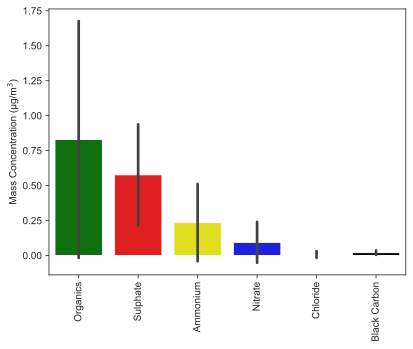

C:\Users\joshi\AppData\Local\Temp\ipykernel_18996\2328323104.py:32: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = ACSM_df.mean()


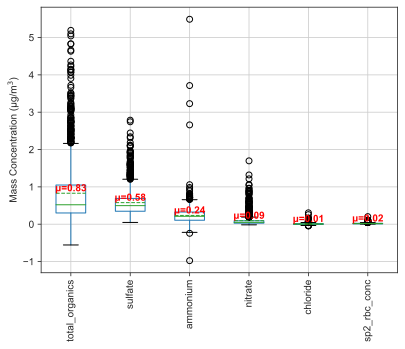

In [6]:
#1.1 ############## ACSM+SP2 Composition Barplot ####################

ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
ACSM_df["sp2_rbc_conc"] = (SP2_df0[["sp2_rbc_conc"]]*10**(-3)) #in ug/m3
# display(ACSM_df.mean(), ACSM_df.std())
# display(ACSM_df)

fig, ax = plt.subplots()

sns.barplot(data=ACSM_df,ci="sd", palette={"total_organics": "green", "sulfate": "red", "ammonium": "yellow", "nitrate": "blue", "chloride": "pink", "sp2_rbc_conc":"black"})
plt.xticks(rotation=90)
plt.ylabel("Mass Concentration (\u03BCg/m$^3$)")
ax.set_xticklabels(["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride", "Black Carbon"])
plt.savefig('ACMS_SP2_Composition_Plot.png', bbox_inches='tight', dpi=600) #, dpi=600 transparent=True
plt.show()


# #2.8 ############## Plot ACSM+SP2 BoxPLot ####################
# sns.set_style("ticks")
# axes = ACSM_df.boxplot()#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# plt.ylabel("Mass Concentration (\u03BCg/m$^3$)")
# plt.xticks(rotation=90)
# plt.savefig('BoxPlot_ACSM_SP2.png', bbox_inches='tight', dpi=600)
# plt.show()

#2.8 ############## Plot ACSM+SP2 BoxPLot ####################
sns.set_style("ticks")
axes = ACSM_df.boxplot(return_type='both', meanline=True, showmeans=True)#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# Calculate mean of each column
mean_values = ACSM_df.mean()

# Add mean values to boxplot figure
for i, mean_value in enumerate(mean_values):
    plt.text(i+1, mean_value, f"μ={round(mean_value, 2)}", ha='center', va='bottom', fontweight='bold', fontsize=10, color='red')

plt.ylabel("Mass Concentration (\u03BCg/m$^3$)")
plt.xticks(rotation=90)
plt.savefig('BoxPlot_ACSM_SP2.png', bbox_inches='tight', dpi=600)
plt.show()


In [84]:
#2 ############## SGP Data Analysis Setup | Aim: PSAP vs PASS Plotting (Timeseries&Scatterplot) ####################

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
# NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
# ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]

############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# display(PASS_df.head(), PSAP_df.head(), NEPH_df.head())


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True) # Nothing changes on hr-avging again #
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True) # Hr-avging for the first time
# NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
# ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
# NEPH_1hr_df = NEPH_df.resample('1440min', on='time').mean()
# ACSM_1hr_df = ACSM_df.resample('1440min', on='time').mean()


# Aligning PASS and PSAP data only for better timeseries and scatterplots # Later all instruments to be included in Combined_df
# Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df], axis=1)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df], axis=1) # To show only PASS and PSAP exclusively in quantity and quality


Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# Look at the BoxPlot distribution of data and set upper limit | Now: 50
Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
Combined_df.dropna(inplace=True)


######################
# ALWAYS USE LOC WHEN SELECTING AND SETTING VALUES TOGETHER IN ONE STEP FOR ONLY 1 COLUMN
# print(Combined_df.isna().any(axis=1).sum(), len(Combined_df))
# Combined_df.dropna(inplace=True)
# print(Combined_df.isna().any(axis=1).sum(), len(Combined_df))


# # Look at the BoxPlot distribution of data and set upper limit | Now: 100 | TBH: Keep 30 for both PSAP and PASS for better BoxPlots and Analysis
# # Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# Combined_df.loc[Combined_df["absorption_coefficient_405nm"] <= 0, "absorption_coefficient_405nm"] = np.nan
# Combined_df.loc[Combined_df["absorption_coefficient_721nm"] <= 0, "absorption_coefficient_721nm"] = np.nan
# Combined_df.loc[Combined_df["absorption_coefficient_1047nm"] <= 0, "absorption_coefficient_1047nm"] = np.nan


# print(Combined_df.isna().sum(axis=1).sum(), len(Combined_df))
# Combined_df.dropna(inplace=True)
# print(Combined_df.isna().sum(axis=1).sum(), len(Combined_df))


# Combined_df.loc[Combined_df["absorption_coefficient_405nm"] > 100, "absorption_coefficient_405nm"] = np.nan
# Combined_df.loc[Combined_df["absorption_coefficient_721nm"] > 100, "absorption_coefficient_721nm"] = np.nan
# Combined_df.loc[Combined_df["absorption_coefficient_1047nm"] > 100, "absorption_coefficient_1047nm"] = np.nan

# print(Combined_df.isna().any(axis=1).sum(), len(Combined_df))
# Combined_df.dropna(inplace=True)
# print(Combined_df.isna().sum(axis=1).sum(), len(Combined_df))

# Combined_df.loc[Combined_df["Ba_B_PSAP3W"] <= 0, "Ba_B_PSAP3W"] = np.nan
# Combined_df.loc[Combined_df["Ba_G_PSAP3W"] <= 0, "Ba_G_PSAP3W"] = np.nan
# Combined_df.loc[Combined_df["Ba_R_PSAP3W"] <= 0, "Ba_R_PSAP3W"] = np.nan

# print(Combined_df.isna().any(axis=1).sum(), len(Combined_df))
# Combined_df.dropna(inplace=True)
# print(Combined_df.isna().sum(axis=1).sum(), len(Combined_df))

# # # Remove random PSAP outliers based on BoxPlot of PSAP
# # Combined_df[Combined_df["Ba_B_PSAP3W"]>30] = np.nan
# # Combined_df[Combined_df["Ba_G_PSAP3W"]>30] = np.nan
# # Combined_df[Combined_df["Ba_R_PSAP3W"]>30] = np.nan

# # Drop all rows containing any column with NaN 
# print(Combined_df.isna().any(axis=1).sum(), len(Combined_df))
# Combined_df.dropna(inplace=True)
# print(Combined_df.isna().sum(axis=1).sum(), len(Combined_df))
##########################


# display(Combined_df.columns)

# display(Combined_df.head(10))

# # Compute Total Organic + Inorganic Particle concentration
# Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]

# # Stats absorption_coefficient_405nm PSAP_df["Ba_B_PSAP3W"]
display("PASS(405) = " + str(Combined_df["absorption_coefficient_405nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_405nm"].std()) )
display("PASS(721) = " + str(Combined_df["absorption_coefficient_721nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_721nm"].std()) )
display("PASS(1047) = " + str(Combined_df["absorption_coefficient_1047nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_1047nm"].std()) )

display("PSAP(464) = " + str(Combined_df["Ba_B_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_B_PSAP3W"].std()) )
display("PSAP(529) = " + str(Combined_df["Ba_G_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_G_PSAP3W"].std()) )
display("PSAP(648) = " + str(Combined_df["Ba_R_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_R_PSAP3W"].std()) )

# Compute Angstrom Exponents for PASS Data #AAE
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

display("AAE(405-721) = " + str(Combined_df["AAE_PASS_405_721"].mean()) + " ± " + str(Combined_df["AAE_PASS_405_721"].std()) )
display("AAE(721-1047) = " + str(Combined_df["AAE_PASS_721_1047"].mean()) + " ± " + str(Combined_df["AAE_PASS_721_1047"].std()) )
display("AAE(405-1047) = " + str(Combined_df["AAE_PASS_405_1047"].mean()) + " ± " + str(Combined_df["AAE_PASS_405_1047"].std()) )
display("####### Negative AAE(721-1047) => Needs offset addition in PASS 721")


# PASS-721 Offset to keep AAE positive Calculator: 
# Just to confirm the value added in previous cell is correct
AAE_of_averages = -1*np.log(Combined_df["absorption_coefficient_405nm"].mean()/Combined_df["absorption_coefficient_1047nm"].mean()) / np.log(405/1047)
display(f"AAE_of_averages: {AAE_of_averages}")
PASS_721_Average_extrapolated = Combined_df["absorption_coefficient_1047nm"].mean()*(721/1047)**(-AAE_of_averages)
display(f"PASS_721_Average_extrapolated: {PASS_721_Average_extrapolated}")
PASS_721_Offset_add_required = PASS_721_Average_extrapolated - Combined_df["absorption_coefficient_721nm"].mean()
display(f"PASS_721_Offset_add_required: {PASS_721_Offset_add_required}")

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required
display("####### PASS 721 Offset Added ✅ and Recalculate AAE values for Extrapolation of PASS to PSAP wavelengths using correct AAE ")

# # Stats absorption_coefficient_405nm PSAP_df["Ba_B_PSAP3W"]
display("PASS(405) = " + str(Combined_df["absorption_coefficient_405nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_405nm"].std()) )
display("PASS(721) = " + str(Combined_df["absorption_coefficient_721nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_721nm"].std()) )
display("PASS(1047) = " + str(Combined_df["absorption_coefficient_1047nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_1047nm"].std()) )

display("PSAP(464) = " + str(Combined_df["Ba_B_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_B_PSAP3W"].std()) )
display("PSAP(529) = " + str(Combined_df["Ba_G_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_G_PSAP3W"].std()) )
display("PSAP(648) = " + str(Combined_df["Ba_R_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_R_PSAP3W"].std()) )

# Re-Compute Angstrom Exponents for PASS Data #AAE
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

display("Post_721_Offset_Addition AAE(405-721) = " + str(Combined_df["AAE_PASS_405_721"].mean()) + " ± " + str(Combined_df["AAE_PASS_405_721"].std()) )
display("Post_721_Offset_Addition AAE(721-1047) = " + str(Combined_df["AAE_PASS_721_1047"].mean()) + " ± " + str(Combined_df["AAE_PASS_721_1047"].std()) )
display("Post_721_Offset_Addition AAE(405-1047) = " + str(Combined_df["AAE_PASS_405_1047"].mean()) + " ± " + str(Combined_df["AAE_PASS_405_1047"].std()) )

# Extrapolate PASS Data to PSAP Wavelengths #(464,529,648) # @->Extrapolated
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# # Compute Angstrom Exponents for NEPH Data #SAE
# Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
# Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
# Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# display("SAE(450-550) = " + str(Combined_df["SAE_NEPH_450_550"].mean()) + " ± " + str(Combined_df["SAE_NEPH_450_550"].std()) )
# display("SAE(550-700) = " + str(Combined_df["SAE_NEPH_550_700"].mean()) + " ± " + str(Combined_df["SAE_NEPH_550_700"].std()) )
# display("SAE(450-700) = " + str(Combined_df["SAE_NEPH_450_700"].mean()) + " ± " + str(Combined_df["SAE_NEPH_450_700"].std()) )

# # Extrapolate NEPH Data to PSAP Wavelengths #(464,529,648)
# Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
# Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
# Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# # Compute w0(=SSA) at PSAP wavelengths to compute revised coeff for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
# Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
# Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
# Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))

# display("SSA(464) = " + str(Combined_df["w0@464"].mean()) + " ± " + str(Combined_df["w0@464"].std()) )
# display("SSA(529) = " + str(Combined_df["w0@529"].mean()) + " ± " + str(Combined_df["w0@529"].std()) )
# display("SSA(648) = " + str(Combined_df["w0@648"].mean()) + " ± " + str(Combined_df["w0@648"].std()) )

'PASS(405) = 6.247834549540039 ± 3.962353397354609'

'PASS(721) = 1.481498120579114 ± 1.6703434708225662'

'PASS(1047) = 3.386530937721311 ± 1.9627517598742672'

'PSAP(464) = 15.54363092890627 ± 12.727484191445805'

'PSAP(529) = 13.663803583762958 ± 11.473214886763559'

'PSAP(648) = 11.213102540727466 ± 9.340680783182291'

'AAE(405-721) = 3.072201940428565 ± 2.2451571358644293'

'AAE(721-1047) = -3.33782890943813 ± 3.4326520923637096'

'AAE(405-1047) = 0.5545796820607575 ± 1.022660945667293'

'####### Negative AAE(721-1047) => Needs offset addition in PASS 721'

'AAE_of_averages: 0.6447996400344674'

'PASS_721_Average_extrapolated: 4.307447082598294'

'PASS_721_Offset_add_required: 2.82594896201918'

'####### PASS 721 Offset Added ✅ and Recalculate AAE values for Extrapolation of PASS to PSAP wavelengths using correct AAE '

'PASS(405) = 6.247834549540039 ± 3.962353397354609'

'PASS(721) = 4.307447082598294 ± 1.6703434708225662'

'PASS(1047) = 3.386530937721311 ± 1.9627517598742672'

'PSAP(464) = 15.54363092890627 ± 12.727484191445805'

'PSAP(529) = 13.663803583762958 ± 11.473214886763559'

'PSAP(648) = 11.213102540727466 ± 9.340680783182291'

'Post_721_Offset_Addition AAE(405-721) = 0.286960795133114 ± 1.445640741194867'

'Post_721_Offset_Addition AAE(721-1047) = 0.9683359758265498 ± 1.8051319280165508'

'Post_721_Offset_Addition AAE(405-1047) = 0.5545796820607575 ± 1.022660945667293'

In [8]:
Combined_df.shape

(190, 15)

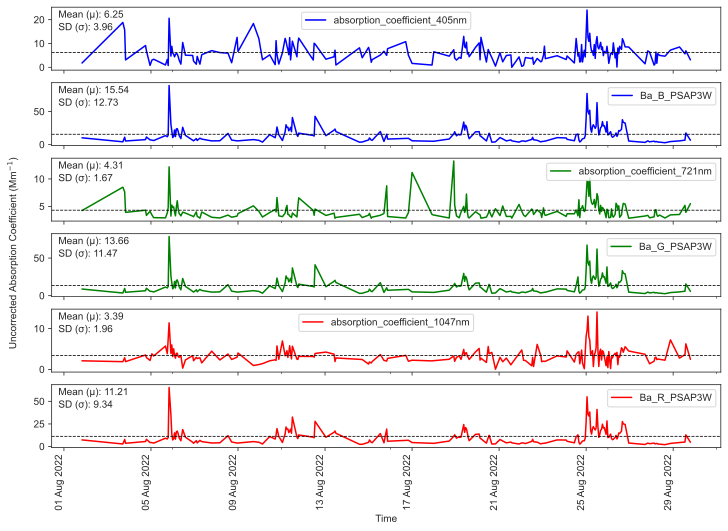

In [9]:
############## LINEPLOT ONLY: Plot PASS&PSAP Data TimeSeries ####################
sns.set_style("ticks")

timeseries_df = Combined_df[["absorption_coefficient_405nm", "Ba_B_PSAP3W", "absorption_coefficient_721nm", "Ba_G_PSAP3W", "absorption_coefficient_1047nm", "Ba_R_PSAP3W"]]
axes = timeseries_df.plot(subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time", color=["b", "b", "g", "g", "r", "r"])

# Compute mean values of each column
means = timeseries_df.mean()
stds = timeseries_df.std()


# Add mean values to the plot
for i, ax in enumerate(axes.flatten()):
    ax.axhline(means[i], color='k', linestyle='--', linewidth=0.8)
    ax.text(0.01, 0.95, f'Mean (μ): {means[i]:.2f}', transform=ax.transAxes, ha='left', va='top')
    ax.text(0.01, 0.75, f'SD (σ): {stds[i]:.2f}', transform=ax.transAxes, ha='left', va='top')

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_formatter(myFmt)

fig=axes[0,0].figure
fig.text(0.08,0.5, "Uncorrected Absorption Coefficient (Mm$^{-1}$)", ha="center", va="center", rotation=90)
plt.xticks(rotation=90)
plt.savefig('TimeSeries_PASS&PSAP.png', bbox_inches='tight', dpi=600)
plt.show()


In [10]:
# ############## DOT PLOT ONLY: Plot PASS&PSAP Data TimeSeries ####################
# sns.set_style("ticks")

# timeseries_df = Combined_df[["absorption_coefficient_405nm", "Ba_B_PSAP3W", "absorption_coefficient_721nm", "Ba_G_PSAP3W", "absorption_coefficient_1047nm", "Ba_R_PSAP3W"]]
# axes = timeseries_df.plot(subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time", color=["b", "b", "g", "g", "r", "r"], style="o", markersize=5, markerfacecolor='none') #

# # Compute mean values of each column
# means = timeseries_df.mean()
# stds = timeseries_df.std()


# # Add mean values to the plot
# for i, ax in enumerate(axes.flatten()):
#     ax.axhline(means[i], color='k', linestyle='--', linewidth=0.8)
#     ax.text(0.01, 0.95, f'Mean (μ): {means[i]:.2f}', transform=ax.transAxes, ha='left', va='top')
#     ax.text(0.01, 0.75, f'SD (σ): {stds[i]:.2f}', transform=ax.transAxes, ha='left', va='top')

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# fig=axes[0,0].figure
# fig.text(0.08,0.5, "Uncorrected Absorption Coefficient (Mm$^{-1}$)", ha="center", va="center", rotation=90)
# plt.xticks(rotation=90)
# plt.savefig('TimeSeries_PASS&PSAP-DotONLY.png', bbox_inches='tight', dpi=600)
# plt.show()


In [11]:
# # ############## BOTH DOT+LINEPLOT PLOT: Plot PASS&PSAP Data TimeSeries ####################
# sns.set_style("ticks")

# timeseries_df = Combined_df[["absorption_coefficient_405nm", "Ba_B_PSAP3W", "absorption_coefficient_721nm", "Ba_G_PSAP3W", "absorption_coefficient_1047nm", "Ba_R_PSAP3W"]]

# fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12,9), sharex=True)

# colors = ["b", "b", "g", "g", "r", "r"]
# markers = ["o", "o", "o", "o", "o", "o"]

# for i, col in enumerate(timeseries_df.columns):
#     axes[i].plot(timeseries_df.index, timeseries_df[col], color=colors[i], marker=markers[i], markersize=4, markerfacecolor='none')
#     axes[i].axhline(timeseries_df[col].mean(), color='k', linestyle='--', linewidth=0.8)
#     axes[i].text(0.01, 0.95, f'Mean (μ): {timeseries_df[col].mean():.2f}', transform=axes[i].transAxes, ha='left', va='top')
#     axes[i].text(0.01, 0.75, f'SD (σ): {timeseries_df[col].std():.2f}', transform=axes[i].transAxes, ha='left', va='top')
    
# axes[-1].set_xlabel("Time")
# fig.text(-0.01,0.5, "Uncorrected Absorption Coefficient (Mm$^{-1}$)", ha="center", va="center", rotation=90)

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# axes[-1].xaxis.set_major_formatter(myFmt)

# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.savefig('TimeSeries_PASS&PSAP.png', bbox_inches='tight', dpi=600)
# plt.show()


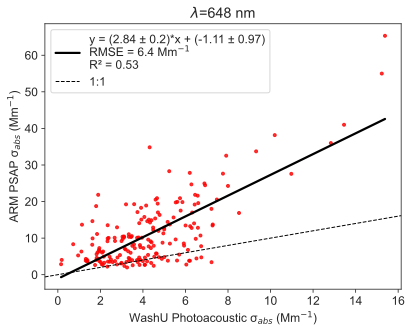

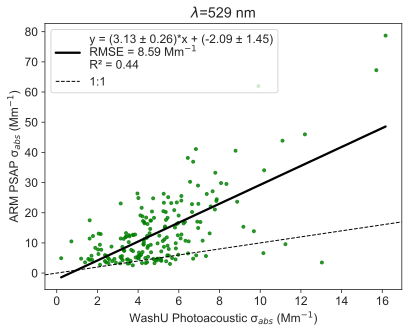

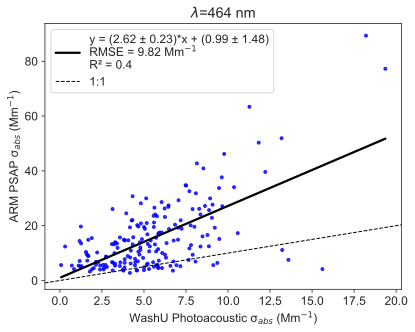

In [85]:
#2Continued: ResultsSaving ############## Code to PSAP vs PASS Plots@ Different Wavelenghts  ####################
#Plot PSAP vs PASS Scatter with Regression line for all 3 Wavelengths ## Change wavelenghth and _R/G/B and colour

#2.1 Red Wavelength Plot
from scipy.optimize import curve_fit
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def linear_reg(X, m, c):
    x1 = X
    return (m*(x1)+c)

X = Combined_df["Ba_PASS@648"] #
y = Combined_df["Ba_R_PSAP3W"] #

popt, pcov = curve_fit(linear_reg, X, y)
popt_std2 = (np.sqrt(np.diag(pcov)))
m, c= popt

residuals = y - linear_reg(X, m, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared2 = 1 - (ss_res / ss_tot)
rmse2 = rmse(linear_reg(X, m, c), y)

plt.title("$\lambda$=648 nm")
sns.regplot(x="Ba_PASS@648", y="Ba_R_PSAP3W", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black", "label":"y = ("+str(np.round(m, 2))+" ± "+str(np.round(popt_std2[0], 2))+")*x + ("+str(np.round(c, 2))+" ± "+str(np.round(popt_std2[1], 2))+")\nRMSE = "+str(np.round(rmse2, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared2, 2))}, marker=".", ci=None) #
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"ARM PSAP σ$_{abs}$ (Mm$^{-1}$)")

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS@648nm.png', bbox_inches='tight', dpi=600) #dpi = 600
plt.show()

##########################
#2.2 Green Wavelength Plot

from scipy.optimize import curve_fit
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def linear_reg(X, m, c):
    x1 = X
    return (m*(x1)+c)

X = Combined_df["Ba_PASS@529"] #
y = Combined_df["Ba_G_PSAP3W"] #

popt, pcov = curve_fit(linear_reg, X, y)
popt_std2 = (np.sqrt(np.diag(pcov)))
m, c= popt

residuals = y - linear_reg(X, m, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared2 = 1 - (ss_res / ss_tot)
rmse2 = rmse(linear_reg(X, m, c), y)

plt.title("$\lambda$=529 nm")
sns.regplot(x="Ba_PASS@529", y="Ba_G_PSAP3W", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black", "label":"y = ("+str(np.round(m, 2))+" ± "+str(np.round(popt_std2[0], 2))+")*x + ("+str(np.round(c, 2))+" ± "+str(np.round(popt_std2[1], 2))+")\nRMSE = "+str(np.round(rmse2, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared2, 2))}, marker=".", ci=None) #
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"ARM PSAP σ$_{abs}$ (Mm$^{-1}$)")

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS@529nm.png', bbox_inches='tight', dpi=600) #dpi = 600
plt.show()


##########################
#2.3 Blue Wavelength Plot

from scipy.optimize import curve_fit
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def linear_reg(X, m, c):
    x1 = X
    return (m*(x1)+c)

X = Combined_df["Ba_PASS@464"] #
y = Combined_df["Ba_B_PSAP3W"] #

popt, pcov = curve_fit(linear_reg, X, y)
popt_std2 = (np.sqrt(np.diag(pcov)))
m, c= popt

residuals = y - linear_reg(X, m, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared2 = 1 - (ss_res / ss_tot)
rmse2 = rmse(linear_reg(X, m, c), y)

plt.title("$\lambda$=464 nm") #
sns.regplot(x="Ba_PASS@464", y="Ba_B_PSAP3W", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black", "label":"y = ("+str(np.round(m, 2))+" ± "+str(np.round(popt_std2[0], 2))+")*x + ("+str(np.round(c, 2))+" ± "+str(np.round(popt_std2[1], 2))+")\nRMSE = "+str(np.round(rmse2, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared2, 2))}, marker=".", ci=None) #
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"ARM PSAP σ$_{abs}$ (Mm$^{-1}$)")

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS@464nm.png', bbox_inches='tight', dpi=600)
plt.show()

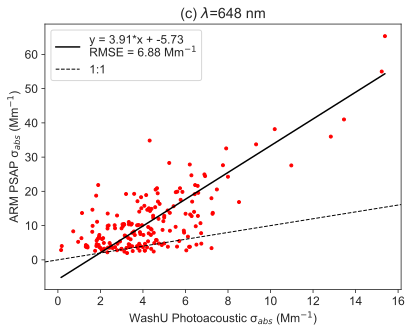

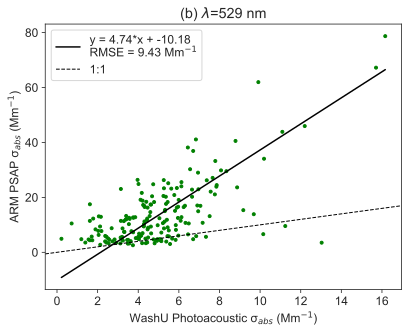

In [86]:
############ PSAP vs PASS: Deming Regression plots as there are errors in the PASS (x-axis) as well
import numpy as np
from scipy.odr import Model, Data, ODR
from scipy.stats import t
from scipy.optimize import curve_fit
from scipy.stats import linregress

import numpy as np
from scipy.odr import Model, RealData, ODR

def deming_reg(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    s_xy = ((x - x.mean()) * (y - y.mean())).sum() 
    s_xx = ((x - x.mean())**2).sum()
    s_yy = ((y - y.mean())**2).sum()

    delta = np.var(y)/np.var(x)

    deming_slope = (s_yy - delta*s_xx + np.sqrt((s_yy - delta*s_xx)**2 + 4*delta*s_xy**2)) / (2*s_xy)
    deming_intercept = y_mean - x_mean*deming_slope
    return deming_slope, deming_intercept
##############

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

##################
# Deming regression for red wavelength (648 nm)
X = Combined_df["Ba_PASS@648"]
Y = Combined_df["Ba_R_PSAP3W"]

slope, intercept = deming_reg(X, Y)

residuals = Y - (slope*X + intercept)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Y-np.mean(Y))**2)
r_squared = 1 - (ss_res / ss_tot)
rmse_val = rmse(slope*X + intercept, Y)

plt.title("(c) $\lambda$=648 nm") #
# sns.regplot(x="Ba_PASS@648", y="Ba_R_PSAP3W", data=Combined_df, scatter_kws={"color": "r"}, 
#             line_kws={"color":"black", "label":"y = ("+str(np.round(slope, 2))+" ± "+str(np.round(slope * 0.1, 2))+")*x + ("+str(np.round(intercept, 2))+" ± "+str(np.round(intercept * 0.1, 2))+")\nRMSE = "+str(np.round(rmse_val, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared, 2))}, 
#             marker=".", ci=None)

plt.plot(X, slope*X + intercept, color='black', label=f"y = {slope:.2f}*x + {intercept:.2f} \nRMSE = "+str(np.round(rmse_val, 2))+" Mm$^{-1}$")
plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_R_PSAP3W"], color='r', marker=".")


plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"ARM PSAP σ$_{abs}$ (Mm$^{-1}$)")

# plt.xlim(0, 50); plt.ylim(0, 50); # Add a 1:1 line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS_Deming@648nm.png', bbox_inches='tight', dpi=600) #dpi = 600
plt.show()


##################
# Deming regression for green wavelength (529 nm)
X = Combined_df["Ba_PASS@529"]
Y = Combined_df["Ba_G_PSAP3W"]

slope, intercept = deming_reg(X, Y)

residuals = Y - (slope*X + intercept)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Y-np.mean(Y))**2)
r_squared = 1 - (ss_res / ss_tot)
rmse_val = rmse(slope*X + intercept, Y)

plt.title("(b) $\lambda$=529 nm")
# sns.regplot(x="Ba_PASS@529", y="Ba_G_PSAP3W", data=Combined_df, scatter_kws={"color": "g"}, 
#             line_kws={"color":"black", "label":"y = ("+str(np.round(slope, 2))+" ± "+str(np.round(slope * 0.1, 2))+")*x + ("+str(np.round(intercept, 2))+" ± "+str(np.round(intercept * 0.1, 2))+")\nRMSE = "+str(np.round(rmse_val, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared, 2))}, 
#             marker=".", ci=None)

plt.plot(X, slope*X + intercept, color='black', label=f"y = {slope:.2f}*x + {intercept:.2f} \nRMSE = "+str(np.round(rmse_val, 2))+" Mm$^{-1}$")
plt.scatter(Combined_df["Ba_PASS@529"], Combined_df["Ba_G_PSAP3W"], color='g', marker=".")


plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"ARM PSAP σ$_{abs}$ (Mm$^{-1}$)")

# plt.xlim(0, 50); plt.ylim(0, 50); # Add a 1:1 line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS_Deming@529nm.png', bbox_inches='tight', dpi=600) #dpi = 600
plt.show()


##################
# Deming regression for blue wavelength (464 nm)
X = Combined_df["Ba_PASS@464"]
Y = Combined_df["Ba_B_PSAP3W"]

slope, intercept = deming_reg(X, Y)

residuals = Y - (slope*X + intercept)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Y-np.mean(Y))**2)
r_squared = 1 - (ss_res / ss_tot)
rmse_val = rmse(slope*X + intercept, Y)

plt.title("(a) $\lambda$=464 nm")
# sns.regplot(x="Ba_PASS@464", y="Ba_B_PSAP3W", data=Combined_df, scatter_kws={"color": "blue"}, 
#             line_kws={"color":"black", "label":"y = ("+str(np.round(slope, 2))+" ± "+str(np.round(slope * 0.1, 2))+")*x + ("+str(np.round(intercept, 2))+" ± "+str(np.round(intercept * 0.1, 2))+")\nRMSE = "+str(np.round(rmse_val, 2))+" Mm$^{-1}$ \nR\u00b2 = "+str(np.round(r_squared, 2))}, 
#             marker=".", ci=None)

plt.plot(X, slope*X + intercept, color='black', label=f"y = {slope:.2f}*x + {intercept:.2f} \nRMSE = "+str(np.round(rmse_val, 2))+" Mm$^{-1}$")
plt.scatter(Combined_df["Ba_PASS@464"], Combined_df["Ba_B_PSAP3W"], color='b', marker=".")


plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"ARM PSAP σ$_{abs}$ (Mm$^{-1}$)")

# plt.xlim(0, 50); plt.ylim(0, 50); # Add a 1:1 line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

plt.legend()
plt.savefig('PSAPvsPASS_Deming@464nm.png', bbox_inches='tight', dpi=600) #dpi = 600
plt.show()

In [14]:
### All Wavelength Plots for PSAP vs PASS

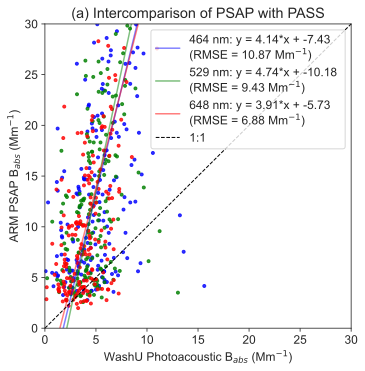

[10.870191725766356, 9.427486364632943, 6.883201684162224]

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Set the global font size to match the figure title size
plt.rcParams.update({'font.size': 12})  # Adjust the size as needed

# ... [rest of the code stays the same]

# Start with a single plot
plt.figure(figsize=(5.5, 5.5))

# Plotting for blue wavelength (464 nm)
X = Combined_df["Ba_PASS@464"]
Y = Combined_df["Ba_B_PSAP3W"]
slope, intercept = deming_reg(X, Y)
plt.scatter(X, Y, color='b', marker=".", alpha=0.8) #, edgecolors="black"
rmse_val = rmse(slope*X + intercept, Y)
plt.plot(X, slope*X + intercept, alpha=0.5, color='b', label=f"464 nm: y = {slope:.2f}*x + {intercept:.2f} \n(RMSE = {np.round(rmse_val, 2)} Mm$^{{-1}}$)")

# RMSE List
PASSvsPSAP_RMSE_List = []
PASSvsPSAP_RMSE_List.append(rmse_val)

# Plotting for green wavelength (529 nm)
X = Combined_df["Ba_PASS@529"]
Y = Combined_df["Ba_G_PSAP3W"]
slope, intercept = deming_reg(X, Y)
plt.scatter(X, Y, color='g', marker=".", alpha=0.8) # , edgecolors="black"
rmse_val = rmse(slope*X + intercept, Y)
plt.plot(X, slope*X + intercept, alpha=0.5, color='g', label=f"529 nm: y = {slope:.2f}*x + {intercept:.2f} \n(RMSE = {np.round(rmse_val, 2)} Mm$^{{-1}}$)")

PASSvsPSAP_RMSE_List.append(rmse_val)

# Plotting for red wavelength (648 nm)
X = Combined_df["Ba_PASS@648"]
Y = Combined_df["Ba_R_PSAP3W"]
slope, intercept = deming_reg(X, Y)
plt.scatter(X, Y, color='r', marker=".", alpha=0.8) # , edgecolors="black"
rmse_val = rmse(slope*X + intercept, Y)
plt.plot(X, slope*X + intercept, alpha=0.5, color='r', label=f"648 nm: y = {slope:.2f}*x + {intercept:.2f} \n(RMSE = {np.round(rmse_val, 2)} Mm$^{{-1}}$)")

PASSvsPSAP_RMSE_List.append(rmse_val)

# Additional settings
plt.title(r"(a) Intercomparison of PSAP with PASS")
plt.xlabel(r"WashU Photoacoustic B$_{abs}$ (Mm$^{-1}$)")
plt.ylabel(r"ARM PSAP B$_{abs}$ (Mm$^{-1}$)")
plt.xlim(0, 30)
plt.ylim(0, 30)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.legend(loc='upper right')

# plt.title("PSAP vs PASS: Deming Regression Analysis")
plt.savefig('Combined_PSAPvsPASS_Deming.png', bbox_inches='tight', dpi=600)
plt.show()

display(PASSvsPSAP_RMSE_List)

In [16]:
#*#

In [17]:
# Average values of PASS at TRACER site
display(Combined_df["Ba_PASS@464"].mean())
display(Combined_df["Ba_PASS@529"].mean())
display(Combined_df["Ba_PASS@648"].mean())

5.549692587807

5.0255433204891595

4.337861149152789

In [18]:
# %RMSE Calculations
display("% RMSE for Average correction algo: ", ((4.57/Combined_df["Ba_PASS@464"].mean()) + (3.69/Combined_df["Ba_PASS@529"].mean()) + (2.69/Combined_df["Ba_PASS@648"].mean()))*100/3)
display("% RMSE for RFR correction algo: ", ((2.24/Combined_df["Ba_PASS@464"].mean()) + (1.63/Combined_df["Ba_PASS@529"].mean()) + (1.59/Combined_df["Ba_PASS@648"].mean()))*100/3)

'% RMSE for Average correction algo: '

72.59464272594471

'% RMSE for RFR correction algo: '

36.48363623131768

In [19]:
# Wavelength averaged RMSE for RFR

In [20]:
display(f"Wavelength Averaged RMSE for average correction: {(4.57+3.69+2.69)/3}")
display(f"Wavelength Averaged RMSE for RFR correction: {(1.63+1.59+2.25)/3}")

'Wavelength Averaged RMSE for average correction: 3.65'

'Wavelength Averaged RMSE for RFR correction: 1.8233333333333333'

In [21]:
display(PASS_721_Offset_add_required)

2.82594896201918

'AAE(405-721) = 0.45975450924650096 ± 1.7011072962524045'

'AAE(721-1047) = 0.9862724258866907 ± 1.96011788900824'

'AAE(405-1047) = 0.6665512092015964 ± 1.150520265293221'

'SAE(450-550) = 1.6684717292636886 ± 0.46424883226852987'

'SAE(550-700) = 2.0358589261308757 ± 0.5753655277508327'

'SAE(450-700) = 1.8689997607137576 ± 0.5197686373769523'

'SSA(464) = 0.787427120664603 ± 0.11234540241746571'

'SSA(529) = 0.7678015887168104 ± 0.10065099955087721'

'SSA(648) = 0.7248394706176601 ± 0.12250115644420413'

'PASS(405) = 13.035103005946368 ± 69.52672097564464'

'PASS(721) = 4.364850805972777 ± 1.7393162236492046'

'PASS(1047) = 3.5051718518595214 ± 2.141507847599581'

'PSAP(464) = 18.900427057532937 ± 14.05434599604799'

'PSAP(529) = 16.62191786981724 ± 12.713626559862982'

'PSAP(648) = 13.51080283292762 ± 10.175531409726577'

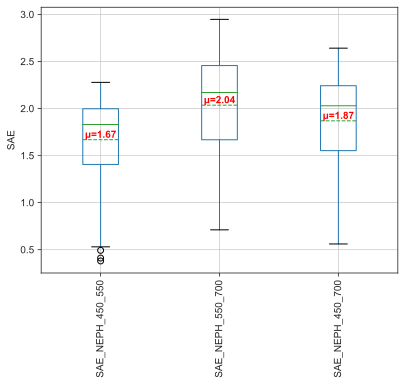

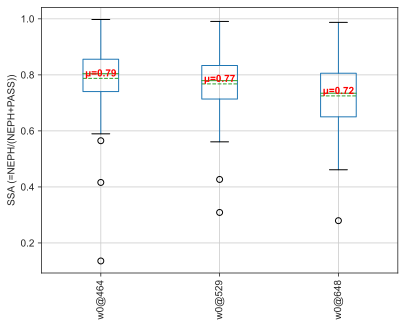

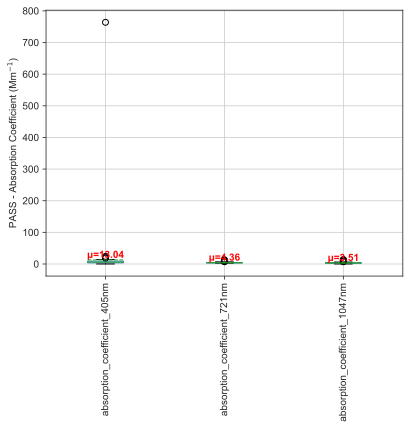

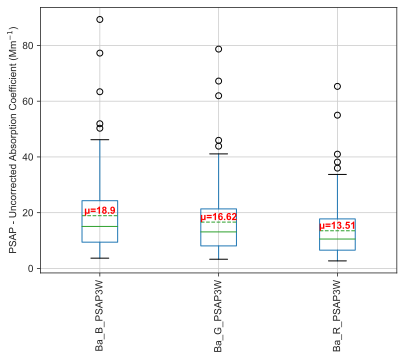

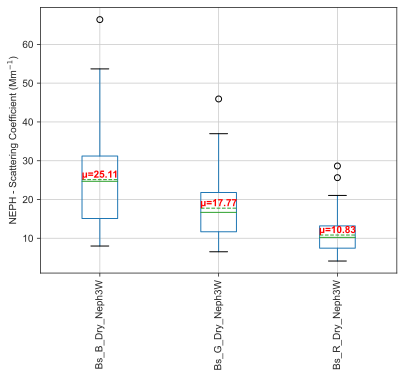

In [22]:
# * DONT LOSE DATA FOR BOX PLOTS JSUT BECAUSE OF COMBINED_DF MAKE SEPARATE BOXPLOTS OF PSAP AND PASS
######## Cell ONLY makes Appendix Plots  ##########

#2 ############## SGP Data Analysis Setup | Aim: PSAP vs PASS Plotting ####################

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
SP2_df  = SP2_df0[["time", "sp2_rbc_conc"]]


############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# display(PASS_df.head(), PSAP_df.head(), NEPH_df.head())


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)
SP2_df["time"]  = pd.to_datetime(SP2_df["time"], infer_datetime_format=True)

# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()
SP2_1hr_df  = SP2_df.resample('60min', on='time').mean()

# Aligning PASS and PSAP data only for better timeseries and scatterplots # Later all instruments to be included in Combined_df
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df, SP2_1hr_df], axis=1)
# Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df], axis=1)

# Look at the BoxPlot distribution of data and set upper limit | Now: 100
Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# Combined_df[Combined_df["absorption_coefficient_405nm"]>30] = np.nan
# Combined_df[Combined_df["absorption_coefficient_721nm"]>30] = np.nan
# Combined_df[Combined_df["absorption_coefficient_1047nm"]>30] = np.nan
# # Remove random PSAP outliers based on BoxPlot of PSAP
# Combined_df[Combined_df["Ba_B_PSAP3W"]>30] = np.nan
# Combined_df[Combined_df["Ba_G_PSAP3W"]>30] = np.nan
# Combined_df[Combined_df["Ba_R_PSAP3W"]>30] = np.nan
Combined_df.dropna(inplace=True)

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required

# # Compute Total Organic + Inorganic Particle concentration
# Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"] #(Combined_df["sp2_rbc_conc"]*10**(-3)) # in ug/m3


# Compute Angstrom Exponents for PASS Data #AAE
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

display("AAE(405-721) = " + str(Combined_df["AAE_PASS_405_721"].mean()) + " ± " + str(Combined_df["AAE_PASS_405_721"].std()) )
display("AAE(721-1047) = " + str(Combined_df["AAE_PASS_721_1047"].mean()) + " ± " + str(Combined_df["AAE_PASS_721_1047"].std()) )
display("AAE(405-1047) = " + str(Combined_df["AAE_PASS_405_1047"].mean()) + " ± " + str(Combined_df["AAE_PASS_405_1047"].std()) )


# Extrapolate PASS Data to PSAP Wavelengths #(464,529,648) # @->Extrapolated
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# Compute Angstrom Exponents for NEPH Data #SAE
Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

display("SAE(450-550) = " + str(Combined_df["SAE_NEPH_450_550"].mean()) + " ± " + str(Combined_df["SAE_NEPH_450_550"].std()) )
display("SAE(550-700) = " + str(Combined_df["SAE_NEPH_550_700"].mean()) + " ± " + str(Combined_df["SAE_NEPH_550_700"].std()) )
display("SAE(450-700) = " + str(Combined_df["SAE_NEPH_450_700"].mean()) + " ± " + str(Combined_df["SAE_NEPH_450_700"].std()) )


# Extrapolate NEPH Data to PSAP Wavelengths #(464,529,648)
Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# Compute w0(=SSA) at PSAP wavelengths to compute revised coeff for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))

display("SSA(464) = " + str(Combined_df["w0@464"].mean()) + " ± " + str(Combined_df["w0@464"].std()) )
display("SSA(529) = " + str(Combined_df["w0@529"].mean()) + " ± " + str(Combined_df["w0@529"].std()) )
display("SSA(648) = " + str(Combined_df["w0@648"].mean()) + " ± " + str(Combined_df["w0@648"].std()) )

# # Stats absorption_coefficient_405nm PSAP_df["Ba_B_PSAP3W"]
display("PASS(405) = " + str(Combined_df["absorption_coefficient_405nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_405nm"].std()) )
display("PASS(721) = " + str(Combined_df["absorption_coefficient_721nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_721nm"].std()) )
display("PASS(1047) = " + str(Combined_df["absorption_coefficient_1047nm"].mean()) + " ± " + str(Combined_df["absorption_coefficient_1047nm"].std()) )

display("PSAP(464) = " + str(Combined_df["Ba_B_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_B_PSAP3W"].std()) )
display("PSAP(529) = " + str(Combined_df["Ba_G_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_G_PSAP3W"].std()) )
display("PSAP(648) = " + str(Combined_df["Ba_R_PSAP3W"].mean()) + " ± " + str(Combined_df["Ba_R_PSAP3W"].std()) )


#2.5 ############## ACSM Composition Timeseries ####################

ACSM_timeseries_df = ACSM_1hr_df
ACSM_timeseries_df["sp2_rbc_conc"] = (SP2_1hr_df["sp2_rbc_conc"]*10**(-3)) # in ug/m3
ACSM_timeseries_df[ACSM_timeseries_df<=0] = np.nan # For removing negative abs values
ACSM_timeseries_df.dropna(inplace=True)
# ACSM_timeseries_df["time"] = Combined_df["time"]

ACSM_timeseries_df.plot(color=["green", "red", "yellow", "blue", "pink", "black"])

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.xticks(rotation=90)
plt.ylabel("Mass Concentration (\u03BCg/m$^3$)")
plt.xlabel("Time")
plt.legend(labels=["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride", "BC (sp2)"])
plt.savefig('ACSM_SP2_TimeSeries.png', bbox_inches='tight', dpi=600)
plt.show()


#2.6 ############## ACSM Mass Fraction Timeseries #################### (NOT REQUIRED TO PLOT)

sns.set_style("white")
ACSM_timeseries_df = ACSM_1hr_df
ACSM_timeseries_df["sp2_rbc_conc"] = (SP2_1hr_df["sp2_rbc_conc"]*10**(-3)) # in ug/m3
ACSM_timeseries_df[ACSM_timeseries_df<=0] = np.nan # For removing negative abs values
ACSM_timeseries_df.dropna(inplace=True)
# ACSM_timeseries_df["time"] = Combined_df["time"]

ACSM_timeseries_df.columns
# ACSM_timeseries_df["total"] =  ACSM_timeseries_df["total_organics"]+ACSM_timeseries_df["sulfate"]+ACSM_timeseries_df["ammonium"]+ACSM_timeseries_df["nitrate"]+ACSM_timeseries_df["chloride"]
ACSM_MF_timeseries_df = pd.DataFrame()
ACSM_MF_timeseries_df["Organic_fraction"] = ACSM_timeseries_df["total_organics"] / (ACSM_timeseries_df["total_organics"]+ACSM_timeseries_df["sulfate"]+ACSM_timeseries_df["ammonium"]+ACSM_timeseries_df["nitrate"]+ACSM_timeseries_df["chloride"]+ACSM_timeseries_df["sp2_rbc_conc"])
ACSM_MF_timeseries_df["Sulphate_fraction"] = ACSM_timeseries_df["sulfate"] / (ACSM_timeseries_df["total_organics"]+ACSM_timeseries_df["sulfate"]+ACSM_timeseries_df["ammonium"]+ACSM_timeseries_df["nitrate"]+ACSM_timeseries_df["chloride"]+ACSM_timeseries_df["sp2_rbc_conc"])
ACSM_MF_timeseries_df["Ammonium_fraction"] = ACSM_timeseries_df["ammonium"] / (ACSM_timeseries_df["total_organics"]+ACSM_timeseries_df["sulfate"]+ACSM_timeseries_df["ammonium"]+ACSM_timeseries_df["nitrate"]+ACSM_timeseries_df["chloride"]+ACSM_timeseries_df["sp2_rbc_conc"])
ACSM_MF_timeseries_df["Nitrate_fraction"] = ACSM_timeseries_df["nitrate"] / (ACSM_timeseries_df["total_organics"]+ACSM_timeseries_df["sulfate"]+ACSM_timeseries_df["ammonium"]+ACSM_timeseries_df["nitrate"]+ACSM_timeseries_df["chloride"]+ACSM_timeseries_df["sp2_rbc_conc"])
ACSM_MF_timeseries_df["Chloride_fraction"] = ACSM_timeseries_df["chloride"] / (ACSM_timeseries_df["total_organics"]+ACSM_timeseries_df["sulfate"]+ACSM_timeseries_df["ammonium"]+ACSM_timeseries_df["nitrate"]+ACSM_timeseries_df["chloride"]+ACSM_timeseries_df["sp2_rbc_conc"])
ACSM_MF_timeseries_df["BC_fraction"] = ACSM_timeseries_df["sp2_rbc_conc"] / (ACSM_timeseries_df["total_organics"]+ACSM_timeseries_df["sulfate"]+ACSM_timeseries_df["ammonium"]+ACSM_timeseries_df["nitrate"]+ACSM_timeseries_df["chloride"]+ACSM_timeseries_df["sp2_rbc_conc"])

# ACSM_MF_timeseries_df.index = ACSM_MF_timeseries_df.index.strftime("%d %b %Y")

ACSM_MF_timeseries_df.plot(color=["green", "red", "yellow", "blue", "pink", "black"])
plt.xticks(rotation=90)
plt.ylabel("Mass Fraction")
plt.xlabel("Time")
plt.legend(labels=["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride", "BC (sp2)"])
plt.savefig('ACSM_SP2_MassFraction_TimeSeries.png', bbox_inches='tight', dpi=600)
plt.show()



#2.7 ############## Plot AAE&SAE TimeSeries #################### (NOT REQUIRED)
# sns.set_style("ticks")

# AAE_SAE_columns = ["AAE_PASS_405_532", "AAE_PASS_532_781", "AAE_PASS_405_781", "SAE_NEPH_450_550", "SAE_NEPH_550_700", "SAE_NEPH_450_700"]
# timeseries_df = Combined_df[AAE_SAE_columns]
# axes = timeseries_df.plot(subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# fig=axes[0,0].figure
# # fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
# fig.text(0.08,0.5, "SAE or AAE values", ha="center", va="center", rotation=90)
# plt.xticks(rotation=90)
# plt.savefig('TimeSeries_AAE&SAE.png', bbox_inches='tight', dpi=600)
# plt.show()



#2.8 ############## Plot AAE BoxPLot ####################
sns.set_style("ticks")

AAE_SAE_columns = ["AAE_PASS_405_721", "AAE_PASS_721_1047", "AAE_PASS_405_1047"]#, "SAE_NEPH_450_550", "SAE_NEPH_550_700", "SAE_NEPH_450_700"]
timeseries_df = Combined_df[AAE_SAE_columns]
axes = timeseries_df.boxplot(return_type='both', meanline=True, showmeans=True)#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# fig=axes[0,0].figure
# fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
# fig.text(0.08,0.5, "SAE or AAE values", ha="center", va="center", rotation=90)

# Calculate mean of each column
mean_values = timeseries_df.mean()

# Add mean values to boxplot figure
for i, mean_value in enumerate(mean_values):
    plt.text(i+1, mean_value, f"μ={round(mean_value, 2)}", ha='center', va='bottom', fontweight='bold', fontsize=10, color='red')


plt.ylabel("AAE")
plt.xticks(rotation=90)
plt.savefig('BoxPlot_AAE.png', bbox_inches='tight', dpi=600)
plt.show()

#2.8 ############## Plot SAE BoxPLot ####################
sns.set_style("ticks")

AAE_SAE_columns = ["SAE_NEPH_450_550", "SAE_NEPH_550_700", "SAE_NEPH_450_700"]
timeseries_df = Combined_df[AAE_SAE_columns]
axes = timeseries_df.boxplot(return_type='both', meanline=True, showmeans=True)#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# fig=axes[0,0].figure
# fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
# fig.text(0.08,0.5, "SAE or AAE values", ha="center", va="center", rotation=90)

# Calculate mean of each column
mean_values = timeseries_df.mean()

# Add mean values to boxplot figure
for i, mean_value in enumerate(mean_values):
    plt.text(i+1, mean_value, f"μ={round(mean_value, 2)}", ha='center', va='bottom', fontweight='bold', fontsize=10, color='red')

plt.ylabel("SAE")
plt.xticks(rotation=90)
plt.savefig('BoxPlot_SAE.png', bbox_inches='tight', dpi=600)
plt.show()



#2.9 ############## Plot SSA BoxPLot #################### #"w0@464", "w0@529", "w0@648"
sns.set_style("ticks")

SSA_columns = ["w0@464", "w0@529", "w0@648"]
timeseries_df = Combined_df[SSA_columns]
axes = timeseries_df.boxplot(return_type='both', meanline=True, showmeans=True)#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# fig=axes[0,0].figure
# fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
# fig.text(0.08,0.5, "SSA(=bs_neph/(bs_neph+ba_pass))", ha="center", va="center", rotation=90)

# Calculate mean of each column
mean_values = timeseries_df.mean()

# Add mean values to boxplot figure
for i, mean_value in enumerate(mean_values):
    plt.text(i+1, mean_value, f"μ={round(mean_value, 2)}", ha='center', va='bottom', fontweight='bold', fontsize=10, color='red')

plt.ylabel("SSA (=NEPH/(NEPH+PASS))") #(=b_scat$_{neph}$/(b_scat$_{neph}$+b_abs$_{pass}$)
plt.xticks(rotation=90)
plt.savefig('BoxPlot_SSA.png', bbox_inches='tight', dpi=600)
plt.show()


#3.0 ############## Plot PASS Absoption coefficients BoxPLot #################### #"Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W" # "Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W"
sns.set_style("ticks")

timeseries_df = Combined_df[["absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
axes = timeseries_df.boxplot(return_type='both', meanline=True, showmeans=True)#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# fig=axes[0,0].figure
# fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
# fig.text(0.08,0.5, "SSA(=bs_neph/(bs_neph+ba_pass))", ha="center", va="center", rotation=90)

# Calculate mean of each column
mean_values = timeseries_df.mean()

# Add mean values to boxplot figure
for i, mean_value in enumerate(mean_values):
    plt.text(i+1, mean_value, f"μ={round(mean_value, 2)}", ha='center', va='bottom', fontweight='bold', fontsize=10, color='red')

plt.ylabel("PASS - Absorption Coefficient (Mm$^{-1}$)") #(=b_scat$_{neph}$/(b_scat$_{neph}$+b_abs$_{pass}$)
plt.xticks(rotation=90)
plt.savefig('BoxPlot_PASS.png', bbox_inches='tight', dpi=600)
plt.show()


#3.0 ############## Plot PSAP Absoption coefficients BoxPLot #################### #"Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W" # "Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W"
sns.set_style("ticks")

timeseries_df = Combined_df[["Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W"]]
axes = timeseries_df.boxplot(return_type='both', meanline=True, showmeans=True)#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# fig=axes[0,0].figure
# fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
# fig.text(0.08,0.5, "SSA(=bs_neph/(bs_neph+ba_pass))", ha="center", va="center", rotation=90)

# Calculate mean of each column
mean_values = timeseries_df.mean()

# Add mean values to boxplot figure
for i, mean_value in enumerate(mean_values):
    plt.text(i+1, mean_value, f"μ={round(mean_value, 2)}", ha='center', va='bottom', fontweight='bold', fontsize=10, color='red')

plt.ylabel("PSAP - Uncorrected Absorption Coefficient (Mm$^{-1}$)") #(=b_scat$_{neph}$/(b_scat$_{neph}$+b_abs$_{pass}$)
plt.xticks(rotation=90)
plt.savefig('BoxPlot_PSAP.png', bbox_inches='tight', dpi=600)
plt.show()

#3.1 ############## Plot NEPH Scattering coefficients BoxPLot #################### #"Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W" # "Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W"
sns.set_style("ticks")

timeseries_df = Combined_df[["Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
axes = timeseries_df.boxplot(return_type='both', meanline=True, showmeans=True)#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# fig=axes[0,0].figure
# fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
# fig.text(0.08,0.5, "SSA(=bs_neph/(bs_neph+ba_pass))", ha="center", va="center", rotation=90)

# Calculate mean of each column
mean_values = timeseries_df.mean()

# Add mean values to boxplot figure
for i, mean_value in enumerate(mean_values):
    plt.text(i+1, mean_value, f"μ={round(mean_value, 2)}", ha='center', va='bottom', fontweight='bold', fontsize=10, color='red')

plt.ylabel("NEPH - Scattering Coefficient (Mm$^{-1}$)") #(=b_scat$_{neph}$/(b_scat$_{neph}$+b_abs$_{pass}$)
plt.xticks(rotation=90)
plt.savefig('BoxPlot_NEPH.png', bbox_inches='tight', dpi=600)
plt.show()



#2.9 ############## Plot AAE&SAE Histogram #################### (Not Required)
# sns.set_style("ticks")

# AAE_SAE_columns = ["AAE_PASS_405_532", "AAE_PASS_532_781", "AAE_PASS_405_781", "SAE_NEPH_450_550", "SAE_NEPH_550_700", "SAE_NEPH_450_700"]
# timeseries_df = Combined_df[AAE_SAE_columns]
# axes = timeseries_df.hist(alpha=0.5, figsize=(10, 5), layout=(2, 3))#subplots=True, layout=(6,1), figsize=(12,9),xlabel="Time")#, color=["b", "g", "r", "b", "g", "r"])
# plt.tight_layout()

# # import matplotlib.dates as mdates
# # myFmt = mdates.DateFormatter('%d %b %Y')
# # plt.gca().xaxis.set_major_formatter(myFmt)

# # fig=axes[0,0].figure
# # fig.text(0.5,0.1, "Some very long and even longer xlabel", ha="center", va="center")
# # fig.text(0.08,0.5, "SAE or AAE values", ha="center", va="center", rotation=90)
# plt.xticks(rotation=90)
# plt.savefig('HistogramPlot_AAE&SAE.png', bbox_inches='tight', dpi=600)
# plt.show()


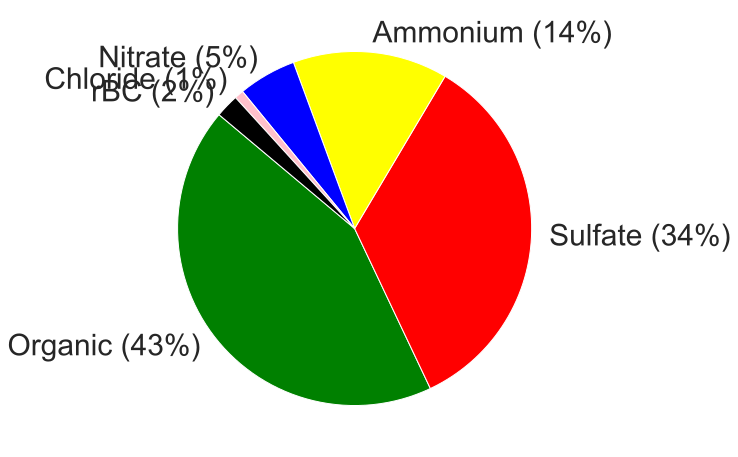

In [83]:
# Average ACSM Mass Fraction Pie Chart Plot
import matplotlib.pyplot as plt

# Set the global font size to match the figure title size
plt.rcParams.update({'font.size': 12})  # Adjust the size as needed

# Sample data (you can replace this with your actual data)
chemicals = ["Organic", "Sulfate", "Ammonium", "Nitrate", "Chloride", "rBC"]
composition = [ACSM_MF_timeseries_df["Organic_fraction"].mean(),
               ACSM_MF_timeseries_df["Sulphate_fraction"].mean(),
               ACSM_MF_timeseries_df["Ammonium_fraction"].mean(),
               ACSM_MF_timeseries_df["Nitrate_fraction"].mean(),
               ACSM_MF_timeseries_df["Chloride_fraction"].mean(),
               ACSM_MF_timeseries_df["BC_fraction"].mean()]

# Define the colors to match the timeseries plot
colors = ["green", "red", "yellow", "blue", "pink", "black"]

# Calculate the percentages
percentages = [f"{value*100:.0f}%" for value in composition]

# Combine the chemical names and percentages for new labels
labels_with_percentages = [f"{chem} ({perc})" for chem, perc in zip(chemicals, percentages)]

# Plot the pie chart with a space between wedges and new labels
plt.figure(figsize=(8, 8))
# plt.title("Average mass fraction of chemical composition\nin the month of August at TRACER main site")
plt.pie(composition, labels=labels_with_percentages, startangle=140, colors=colors, wedgeprops=dict(width=1), textprops={'fontsize': 30})

# Add the legend at the bottom
# plt.legend(chemicals, loc="lower center", bbox_to_anchor=(0.5, 0.2))

# Save the plot
plt.savefig('ACSM_PieChart_MassFraction_Averaged.png', bbox_inches='tight', dpi=600, transparent=True)
plt.savefig('ACSM_PieChart_MassFraction_Averaged.svg', bbox_inches='tight', dpi=600, transparent=True)

# Show the plot
plt.show()


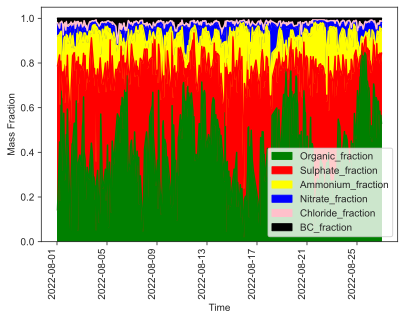

In [24]:
# Plot the stacked area chart of Timeseries of ACSM Mass Fraction Plots
ax = ACSM_MF_timeseries_df.plot.area(stacked=True, color=["green", "red", "yellow", "blue", "pink", "black"])
plt.xticks(rotation=90)
plt.ylabel("Mass Fraction")
plt.xlabel("Time")
plt.legend()
# plt.legend(labels=["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride", "BC (sp2)"])
plt.savefig('ACSM_SP2_MassFraction_TimeSeries.png', bbox_inches='tight', dpi=600)
plt.show()

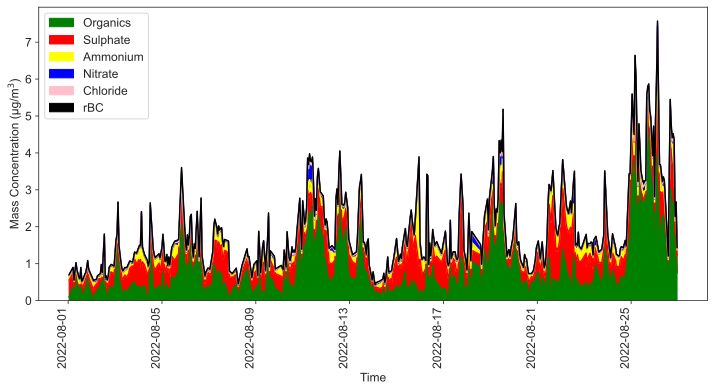

In [81]:
# Plot the stacked area chart of Timeseries of ACSM Total concentration Plots
# Set the global font size to match the figure title size
plt.rcParams.update({'font.size': 12})  # Adjust the size as needed

ax = ACSM_timeseries_df.plot.area(stacked=True, color=["green", "red", "yellow", "blue", "pink", "black"], figsize=(12,6))
plt.xticks(rotation=90)
plt.ylabel("Mass Concentration (\u03BCg/m$^3$)")
plt.xlabel("Time")
# plt.legend()
# plt.legend(labels=["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride", "rBC"])
import matplotlib.patches as mpatches
# Create a list of patches with the correct color and label
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(["green", "red", "yellow", "blue", "pink", "black"], ["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride", "rBC"])]
# Add the custom legend to the plot
plt.legend(handles=legend_patches)
plt.savefig('ACSM_SP2_Concentration_TimeSeries.png', bbox_inches='tight', dpi=600)
plt.savefig('ACSM_SP2_Concentration_TimeSeries.svg', bbox_inches='tight', dpi=600)
plt.show()

# #2.5 ############## ACSM Composition Timeseries ####################

# ACSM_timeseries_df = ACSM_1hr_df
# ACSM_timeseries_df["sp2_rbc_conc"] = (SP2_1hr_df["sp2_rbc_conc"]*10**(-3)) # in ug/m3
# ACSM_timeseries_df[ACSM_timeseries_df<=0] = np.nan # For removing negative abs values
# ACSM_timeseries_df.dropna(inplace=True)
# # ACSM_timeseries_df["time"] = Combined_df["time"]

# ACSM_timeseries_df.plot(color=["green", "red", "yellow", "blue", "pink", "black"])

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%d %b %Y')
# plt.gca().xaxis.set_major_formatter(myFmt)

# plt.xticks(rotation=90)
# plt.ylabel("Mass Concentration (\u03BCg/m$^3$)")
# plt.xlabel("Time")
# plt.legend(labels=["Organics", "Sulphate", "Ammonium", "Nitrate", "Chloride", "BC (sp2)"])
# plt.savefig('ACSM_SP2_TimeSeries.png', bbox_inches='tight', dpi=600)
# plt.show()


In [26]:
# display(axes) # Way to go for changin the lengend variable names in the plot
display(Combined_df.shape)

(119, 33)

In [27]:
# #11: Ogren ONLY ############## Code to just Apply combined Ogren correction using precomputed Coeffficients ####################
# # PASS -> 405, 721, 1047 # PSAP -> 454, 529, 648 # NEPH -> 450, 550, 700

# from string import ascii_letters
# import math
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("ticks")
# %config InlineBackend.figure_format = 'svg'
# pd.options.mode.chained_assignment = None  # default='warn'

# # Create new df with extracting USEFUL variables only
# PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
# PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
# NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
# ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]

# ############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
# PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
# PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
# PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
# ############################################################################################################


# # Convert the time to datetime format
# import datetime
# PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
# PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
# NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
# ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)


# # Convert all DataFrames into 1Hour Average Data Rows
# PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
# PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
# NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
# ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()


# # Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
# Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df], axis=1)
# # Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df], axis=1)

# Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# # Look at the BoxPlot distribution of data and set upper limit | Now: 50
# Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
# Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
# Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
# # Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan
# Combined_df.dropna(inplace=True)

# # Special Offset correction for PASS-721nm to keep AAE values positive
# Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required

# # Compute Total Organic + Inorganic Particle concentration
# # Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# # Compute Angstrom Exponents for PASS Data
# Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
# Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
# Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# # Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
# Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
# Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
# Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# # Compute Angstrom Exponents for NEPH Data
# Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
# Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
# Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# # Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
# Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
# Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
# Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# # Compute Natural Log of PSAP Transmittance Data at all Wavelengths
# Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
# Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
# Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# # Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
# ###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
# Combined_df["s@464"] = 0.015
# Combined_df["s@529"] = 0.017
# Combined_df["s@648"] = 0.022

# Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
# Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
# Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# # Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
# Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
# Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
# Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# # Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
# Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
# Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
# Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# # display(Combined_df.head())
# # display(Combined_df.columns)

# #3SavingResults: Unrevised Virkkula's Predictions for Diffferent Wavelengths
# #  // Change wavelenght#, _RBG# Code, "Blue_Coef" and Plot "Colour" to get different results

# ################################
# # 3.1 Red Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_R_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@648"]
# Tr = Combined_df["transmittance_R"]

# # Combined_df["Ba_Bond_Ogren@648"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: ARM VAP pdf
# Combined_df["Ba_Bond_Ogren@648"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@648"] - Combined_df["Ba_Bond_Ogren@648"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@648"]-np.mean(Combined_df["Ba_PASS@648"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Bond_Ogren@648"], Combined_df["Ba_PASS@648"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Bond-Ogren_Correction Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=648 nm") #
# sns.regplot(x="Ba_PASS@648", y="Ba_Bond_Ogren@648", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Bond-Ogren (2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Bond-Ogren B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.savefig('Ba_OgrenBond_Correction@648.png', bbox_inches='tight', dpi=600)
# plt.show()



# #########################################
# # 3.2 Green Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_G_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@529"]
# Tr = Combined_df["transmittance_G"]

# # Combined_df["Ba_Bond_Ogren@529"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH)
# Combined_df["Ba_Bond_Ogren@529"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@529"] - Combined_df["Ba_Bond_Ogren@529"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@529"]-np.mean(Combined_df["Ba_PASS@529"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Bond_Ogren@529"], Combined_df["Ba_PASS@529"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Bond-Ogren_Correction Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=529 nm") #
# sns.regplot(x="Ba_PASS@529", y="Ba_Bond_Ogren@529", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Bond-Ogren (2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Bond-Ogren B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.savefig('Ba_OgrenBond_Correction@529.png', bbox_inches='tight', dpi=600)
# plt.show()


# #########################################
# # 3.3 Blue Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_B_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@464"]
# Tr = Combined_df["transmittance_B"]

# # Combined_df["Ba_Bond_Ogren@464"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH)
# Combined_df["Ba_Bond_Ogren@464"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@464"] - Combined_df["Ba_Bond_Ogren@464"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@464"]-np.mean(Combined_df["Ba_PASS@464"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Bond_Ogren@464"], Combined_df["Ba_PASS@464"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Bond-Ogren_Correction Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=464 nm") #
# sns.regplot(x="Ba_PASS@464", y="Ba_Bond_Ogren@464", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Bond-Ogren (2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Bond-Ogren B$_{abs}$ (Mm$^{-1}$)")
# # # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
# plt.savefig('Ba_OgrenBond_Correction@464.png', bbox_inches='tight', dpi=600)
# plt.show()


In [28]:
Combined_df.shape

(119, 33)

In [29]:
# #12: REVISED Ogren ONLY ############## Code to just Apply combined Ogren correction using precomputed Coeffficients ####################

# from string import ascii_letters
# import math
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("ticks")
# %config InlineBackend.figure_format = 'svg'
# pd.options.mode.chained_assignment = None  # default='warn'

# # Create new df with extracting USEFUL variables only
# PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
# PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
# NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
# ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]

# ############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
# PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
# PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
# PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
# ############################################################################################################


# # Convert the time to datetime format
# import datetime
# PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
# PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
# NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
# ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)


# # Convert all DataFrames into 1Hour Average Data Rows
# PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
# PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
# NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
# ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()


# # Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
# Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df], axis=1)
# Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# Combined_df[Combined_df["absorption_coefficient_405nm"]>15] = np.nan
# Combined_df[Combined_df["absorption_coefficient_721nm"]>15] = np.nan
# Combined_df[Combined_df["absorption_coefficient_1047nm"]>15] = np.nan
# Combined_df.dropna(inplace=True)

## Special Offset correction for PASS-721nm to keep AAE values positive
## Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required



# # Compute Total Organic + Inorganic Particle concentration
# Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# # Compute Angstrom Exponents for PASS Data
# Combined_df["AE_PASS_405_532"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/532)
# Combined_df["AE_PASS_532_781"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(532/781)

# # Extrapolate PASS Data to PSAP Wavelengths(464,529,648)
# Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AE_PASS_405_532"])
# Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/532)**(-1*Combined_df["AE_PASS_405_532"])
# Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/781)**(-1*Combined_df["AE_PASS_532_781"])

# # Compute Angstrom Exponents for NEPH Data
# Combined_df["AE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
# Combined_df["AE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)

# # Extrapolate NEPH Data to PSAP Wavelengths(464,529,648)
# Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["AE_NEPH_450_550"])
# Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["AE_NEPH_450_550"])
# Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["AE_NEPH_550_700"])

# # Compute Natural Log of PSAP Transmittance Data at all Wavelengths
# Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
# Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
# Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# # Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
# ###Changed: Based on unrevised Ogren
# Combined_df["s@464"] = 0.0164
# Combined_df["s@529"] = 0.0164
# Combined_df["s@648"] = 0.0164

# Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
# Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
# Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# # Compute Approximate w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PSAP_abs)
# Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
# Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
# Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# # Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
# Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
# Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
# Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# # display(Combined_df.head())
# # display(Combined_df.columns)

# #3SavingResults: Unrevised Virkkula's Predictions for Diffferent Wavelengths
# #  // Change wavelenght#, _RBG# Code, "Blue_Coef" and Plot "Colour" to get different results

# ################################
# # 3.1 Red Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PASS = Combined_df["Ba_PASS@648"]
# ba_PSAP = Combined_df["Ba_R_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@648"]
# Tr = Combined_df["transmittance_R"]


# display("Computing Ogren Coefficients@648nm")

# def func0(X, a0, b0):
#     x1 = X
#     return ((1/(a0*x1+b0)))

# X = Tr
# y = Combined_df["f(Tr)@648"]

# popt, pcov = curve_fit(func0, X, y)
# std1 = np.sqrt(np.diag(pcov))
# a0, b0 = popt

# Combined_df["Ba_Revised_Bond_Ogren@648"] = (1/(a0*Tr+b0))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)

# display("a0 = "+str(a0)+" +/- "+str(std1[0]), "b0 = "+str(b0)+" +/- "+str(std1[1]))#, "c0 = "+str(c0)+" +/- "+str(std1[2]))

# # Rounding off and saving k0, k1, h0, h1 and stds
# a0 = np.round(a0, 3); std1[0] = np.round(std1[0], 3);
# b0 = np.round(b0, 3); std1[1] = np.round(std1[1], 3);
# coef_Ogren_R = [str(a0)+" ± "+str(std1[0]), str(b0)+" ± "+str(std1[1])]

# # Combined_df["Ba_Bond_Ogren@648"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: ARM VAP pdf
# # Combined_df["Ba_Bond_Ogren@648"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@648"] - Combined_df["Ba_Revised_Bond_Ogren@648"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@648"]-np.mean(Combined_df["Ba_PASS@648"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Revised_Bond_Ogren@648"], Combined_df["Ba_PASS@648"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Revised_Bond-Ogren_Correction Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=648 nm") #
# sns.regplot(x="Ba_PASS@648", y="Ba_Revised_Bond_Ogren@648", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Bond-Ogren\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Revised Bond-Ogren B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.savefig('Ba_Revised_OgrenBond_Correction@648.png', bbox_inches='tight', dpi=600)
# plt.show()



# #########################################
# # 3.2 Green Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PASS = Combined_df["Ba_PASS@529"]
# ba_PSAP = Combined_df["Ba_G_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@529"]
# Tr = Combined_df["transmittance_G"]


# display("Computing Ogren Coefficients@648nm")

# def func0(X, a0, b0):
#     x1 = X
#     return ((1/(a0*x1+b0)))

# X = Tr
# y = Combined_df["f(Tr)@529"]

# popt, pcov = curve_fit(func0, X, y)
# std1 = np.sqrt(np.diag(pcov))
# a0, b0 = popt

# Combined_df["Ba_Revised_Bond_Ogren@529"] = (1/(a0*Tr+b0))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)

# display("a0 = "+str(a0)+" +/- "+str(std1[0]), "b0 = "+str(b0)+" +/- "+str(std1[1]))#, "c0 = "+str(c0)+" +/- "+str(std1[2]))

# # Rounding off and saving k0, k1, h0, h1 and stds
# a0 = np.round(a0, 3); std1[0] = np.round(std1[0], 3);
# b0 = np.round(b0, 3); std1[1] = np.round(std1[1], 3);
# coef_Ogren_R = [str(a0)+" ± "+str(std1[0]), str(b0)+" ± "+str(std1[1])]

# # Combined_df["Ba_Bond_Ogren@529"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH)
# # Combined_df["Ba_Revised_Bond_Ogren@529"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@529"] - Combined_df["Ba_Revised_Bond_Ogren@529"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@529"]-np.mean(Combined_df["Ba_PASS@529"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Revised_Bond_Ogren@529"], Combined_df["Ba_PASS@529"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Bond-Ogren_Correction Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=529 nm") #
# sns.regplot(x="Ba_PASS@529", y="Ba_Revised_Bond_Ogren@529", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Bond-Ogren\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Revised Bond-Ogren B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.savefig('Ba_Revised_OgrenBond_Correction@529.png', bbox_inches='tight', dpi=600)
# plt.show()


# #########################################
# # 3.3 Blue Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PASS = Combined_df["Ba_PASS@464"]
# ba_PSAP = Combined_df["Ba_B_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@464"]
# Tr = Combined_df["transmittance_B"]


# display("Computing Ogren Coefficients@648nm")

# def func0(X, a0, b0):
#     x1 = X
#     return ((1/(a0*x1+b0)))

# X = Tr
# y = Combined_df["f(Tr)@464"]

# popt, pcov = curve_fit(func0, X, y)
# std1 = np.sqrt(np.diag(pcov))
# a0, b0 = popt

# Combined_df["Ba_Revised_Bond_Ogren@464"] = (1/(a0*Tr+b0))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)

# display("a0 = "+str(a0)+" +/- "+str(std1[0]), "b0 = "+str(b0)+" +/- "+str(std1[1]))#, "c0 = "+str(c0)+" +/- "+str(std1[2]))

# # Rounding off and saving k0, k1, h0, h1 and stds
# a0 = np.round(a0, 3); std1[0] = np.round(std1[0], 3);
# b0 = np.round(b0, 3); std1[1] = np.round(std1[1], 3);
# coef_Ogren_R = [str(a0)+" ± "+str(std1[0]), str(b0)+" ± "+str(std1[1])]

# # Combined_df["Ba_Bond_Ogren@464"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH)
# # Combined_df["Ba_Revised_Bond_Ogren@464"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@464"] - Combined_df["Ba_Revised_Bond_Ogren@464"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@464"]-np.mean(Combined_df["Ba_PASS@464"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Revised_Bond_Ogren@464"], Combined_df["Ba_PASS@464"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Revised_Bond-Ogren_Correction Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=464 nm") #
# sns.regplot(x="Ba_PASS@464", y="Ba_Revised_Bond_Ogren@464", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Bond-Ogren\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Revised Bond-Ogren B$_{abs}$ (Mm$^{-1}$)")
# # # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
# plt.savefig('Ba_Revised_OgrenBond_Correction@464.png', bbox_inches='tight', dpi=600)
# plt.show()


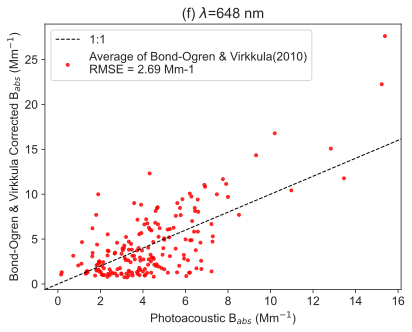

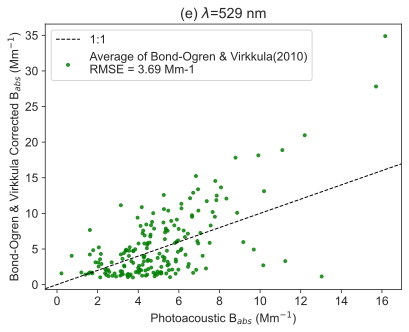

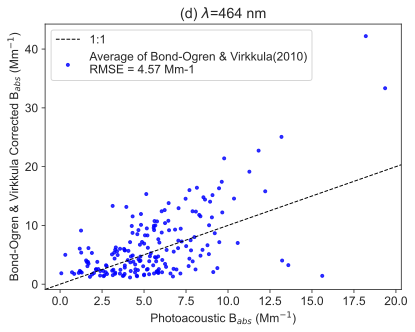

In [69]:
#10 ############## Code to just Apply combined Ogren+Virkkula average correction using precomputed Coeffficients ####################

from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]

############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df], axis=1)
# Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df], axis=1)

Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# Look at the BoxPlot distribution of data and set upper limit | Now: 50
Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
# Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
# Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
# Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan
Combined_df.dropna(inplace=True)

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required


# Compute Total Organic + Inorganic Particle concentration
# Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@464"] = 0.015
Combined_df["s@529"] = 0.017
Combined_df["s@648"] = 0.022

Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]
# display(Combined_df.head())
# display(Combined_df.columns)

#3SavingResults: Unrevised Virkkula's Predictions for Diffferent Wavelengths
#  // Change wavelenght#, _RBG# Code, "Blue_Coef" and Plot "Colour" to get different results

################################
# 3.1 Red Wavelength Plot
# Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_R_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@648"]
Tr = Combined_df["transmittance_R"]
Combined_df["Ba_Virkkula_Unrevised@648"] = 1

Blue_Coef = [0.377, -0.640, 1.16, -0.63]
Green_Coef = [0.358, -0.640, 1.17, -0.71]
Red_Coef = [0.352, -0.674, 1.14, -0.72]

k0, k1, h0, h1 = Red_Coef ####################Need to be changed for different Wavelength#################

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula_Unrevised@648"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@648"])

# Combined_df["Ba_Bond_Ogren@648"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: ARM VAP pdf
Combined_df["Ba_Bond_Ogren@648"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)

Combined_df["Ba_Average_Correction@648"] = (Combined_df["Ba_Bond_Ogren@648"] + Combined_df["Ba_Virkkula_Unrevised@648"])/2

# display(Combined_df["Ba_Virkkula@648"])
# display(f(Combined_df["Ba_Virkkula@648"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@648"] - Combined_df["Ba_Average_Correction@648"]
ss_Res = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@648"]-np.mean(Combined_df["Ba_PASS@648"]))**2)

Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Average_Correction@648"], Combined_df["Ba_PASS@648"])

metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Average_Correction Prediction"])
# display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
plt.title("(f) $\lambda$=648 nm") #
sns.regplot(x="Ba_PASS@648", y="Ba_Average_Correction@648", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Average of Bond-Ogren & Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Bond-Ogren & Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('Ba_Average_Correction@648.png', bbox_inches='tight', dpi=600)
plt.show()



#########################################
# 3.2 Green Wavelength Plot
# Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_G_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@529"]
Tr = Combined_df["transmittance_G"]
Combined_df["Ba_Virkkula_Unrevised@529"] = 1

Blue_Coef = [0.377, -0.640, 1.16, -0.63]
Green_Coef = [0.358, -0.640, 1.17, -0.71]
Red_Coef = [0.352, -0.674, 1.14, -0.72]

k0, k1, h0, h1 = Green_Coef ####################Need to be changed for different Wavelength#################

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_G_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@529"], Tr = Combined_df["transmittance_G"], s = Combined_df["s@529"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula_Unrevised@529"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@529"])

# Combined_df["Ba_Bond_Ogren@529"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH)
Combined_df["Ba_Bond_Ogren@529"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)


Combined_df["Ba_Average_Correction@529"] = (Combined_df["Ba_Bond_Ogren@529"] + Combined_df["Ba_Virkkula_Unrevised@529"])/2


# display(Combined_df["Ba_Virkkula@648"])
# display(f(Combined_df["Ba_Virkkula@648"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@529"] - Combined_df["Ba_Average_Correction@529"]
ss_Res = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@529"]-np.mean(Combined_df["Ba_PASS@529"]))**2)

Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Average_Correction@529"], Combined_df["Ba_PASS@529"])

metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Average_Correction Prediction"])
# display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
plt.title("(e) $\lambda$=529 nm") #
sns.regplot(x="Ba_PASS@529", y="Ba_Average_Correction@529", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Average of Bond-Ogren & Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Bond-Ogren & Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('Ba_Average_Correction@529.png', bbox_inches='tight', dpi=600)
plt.show()


#########################################
# 3.3 Blue Wavelength Plot
# Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

from scipy.optimize import fsolve

ba_PSAP = Combined_df["Ba_B_PSAP3W"]
bs_NEPH = Combined_df["Bs_NEPH@464"]
Tr = Combined_df["transmittance_B"]
Combined_df["Ba_Virkkula_Unrevised@464"] = 1

Blue_Coef = [0.377, -0.640, 1.16, -0.63]
Green_Coef = [0.358, -0.640, 1.17, -0.71]
Red_Coef = [0.352, -0.674, 1.14, -0.72]

k0, k1, h0, h1 = Blue_Coef ####################Need to be changed for different Wavelength#################

def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_B_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@464"], Tr = Combined_df["transmittance_B"], s = Combined_df["s@464"]):
    return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

Combined_df["Ba_Virkkula_Unrevised@464"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@464"])

# Combined_df["Ba_Bond_Ogren@464"] = (1/2.58)*(1/(0.6*Tr+0.4))*(ba_PSAP) - (0.0164*bs_NEPH)
Combined_df["Ba_Bond_Ogren@464"] = (1/(1.5557*Tr+1.0227))*(ba_PSAP) - (0.0164*bs_NEPH) #Ref: Virkkula (2010) Eqn. (3)

Combined_df["Ba_Average_Correction@464"] = (Combined_df["Ba_Bond_Ogren@464"] + Combined_df["Ba_Virkkula_Unrevised@464"])/2

# display(Combined_df["Ba_Virkkula@648"])
# display(f(Combined_df["Ba_Virkkula@648"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]))


#Metrics DataFrame Table
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
residuals = Combined_df["Ba_PASS@464"] - Combined_df["Ba_Average_Correction@464"]
ss_Res = np.sum(residuals**2)
ss_tot = np.sum((Combined_df["Ba_PASS@464"]-np.mean(Combined_df["Ba_PASS@464"]))**2)

Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Average_Correction@464"], Combined_df["Ba_PASS@464"])

metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Ba_Average_Correction Prediction"])
# display(metrics_df)

## Virkkula B_abs vs B_abs_PASS
plt.title("(d) $\lambda$=464 nm") #
sns.regplot(x="Ba_PASS@464", y="Ba_Average_Correction@464", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Average of Bond-Ogren & Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"Bond-Ogren & Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")
# # Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig('Ba_Average_Correction@464.png', bbox_inches='tight', dpi=600)
plt.show()


In [31]:
### Combined Wavelength Plot:

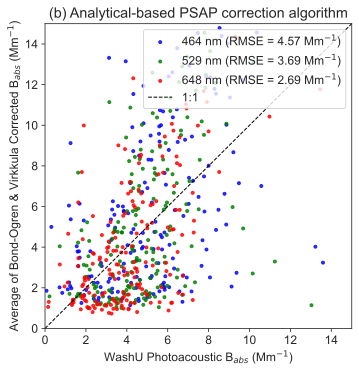

[4.569508504864214, 3.685617505316555, 2.687839029160072]

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import fsolve

# Set the global font size to match the figure title size
plt.rcParams.update({'font.size': 12})  # Adjust the size as needed


Analytical_RMSE_List = []

# Assuming 'Combined_df' is already defined and contains the required columns

def plot_wavelength(dataframe, x_col, y_col, color, label, title):
    sns.regplot(x=x_col, y=y_col, data=dataframe, scatter_kws={"color": color}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label=label)

plt.figure(figsize=(5.5, 5.5))  # Adjust the size as needed

# Plot for 464 nm (Blue)
rmse_val = rmse(Combined_df["Ba_Average_Correction@464"], Combined_df["Ba_PASS@464"])
Analytical_RMSE_List.append(rmse_val)
plot_wavelength(Combined_df, "Ba_PASS@464", "Ba_Average_Correction@464", "b", f"464 nm (RMSE = {np.round(rmse_val, 2)} Mm$^{{-1}}$)", "")

# Plot for 529 nm (Green)
rmse_val = rmse(Combined_df["Ba_Average_Correction@529"], Combined_df["Ba_PASS@529"])
Analytical_RMSE_List.append(rmse_val)
plot_wavelength(Combined_df, "Ba_PASS@529", "Ba_Average_Correction@529", "g", f"529 nm (RMSE = {np.round(rmse_val, 2)} Mm$^{{-1}}$)", "")

# Plot for 648 nm (Red)
rmse_val = rmse(Combined_df["Ba_Average_Correction@648"], Combined_df["Ba_PASS@648"])
Analytical_RMSE_List.append(rmse_val)
plot_wavelength(Combined_df, "Ba_PASS@648", "Ba_Average_Correction@648", "r", f"648 nm (RMSE = {np.round(rmse_val, 2)} Mm$^{{-1}}$)", "")


# plt.title("B_abs vs B_abs_PASS for Different Wavelengths")
plt.xlabel(r"WashU Photoacoustic B$_{abs}$ (Mm$^{-1}$)")  # Code for Super and Sub Script
plt.ylabel(r"Average of Bond-Ogren & Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")
plt.title("(b) Analytical-based PSAP correction algorithm")

# Code to change the order of the legend
handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles, labels, title="Wavelength", loc='upper left')
plt.xlim(0, 15)
plt.ylim(0, 15)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.legend(loc='upper right')

plt.savefig('Combined_Ba_Average_Correction.png', bbox_inches='tight', dpi=600)
plt.show()

display(Analytical_RMSE_List)

In [33]:
#*#

In [34]:
# #3 ############## Code to just Apply Unrevised Virkkula Algo using precomputed Virkkula(2010) Coefficients ####################

# from string import ascii_letters
# import math
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("ticks")
# %config InlineBackend.figure_format = 'svg'
# pd.options.mode.chained_assignment = None  # default='warn'

# # Create new df with extracting USEFUL variables only
# PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
# PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
# NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
# ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]

# ############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
# PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
# PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
# PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
# ############################################################################################################


# # Convert the time to datetime format
# import datetime
# PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
# PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
# NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
# ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)


# # Convert all DataFrames into 1Hour Average Data Rows
# PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
# PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
# NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
# ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()


# # Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
# Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df], axis=1)
# # Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df], axis=1)

# Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# # Look at the BoxPlot distribution of data and set upper limit | Now: 50
# Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
# Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
# Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
# # Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan
# Combined_df.dropna(inplace=True)

# # Special Offset correction for PASS-721nm to keep AAE values positive
# Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required


# # Compute Total Organic + Inorganic Particle concentration
# # Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# # Compute Angstrom Exponents for PASS Data
# Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
# Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
# Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# # Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
# Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
# Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
# Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# # Compute Angstrom Exponents for NEPH Data
# Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
# Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
# Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# # Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
# Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
# Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
# Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# # Compute Natural Log of PSAP Transmittance Data at all Wavelengths
# Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
# Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
# Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# # Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
# ###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
# Combined_df["s@464"] = 0.015
# Combined_df["s@529"] = 0.017
# Combined_df["s@648"] = 0.022

# Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
# Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
# Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# # Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
# Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
# Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
# Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# # Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
# Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
# Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
# Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# # display(Combined_df.head())
# # display(Combined_df.columns)




In [35]:
# #3SavingResults: Unrevised Virkkula's Predictions for Diffferent Wavelengths
# #  // Change wavelenght#, _RBG# Code, "Blue_Coef" and Plot "Colour" to get different results

# ################################
# # 3.1 Red Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_R_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@648"]
# Tr = Combined_df["transmittance_R"]
# Combined_df["Ba_Virkkula_Unrevised@648"] = 1

# Blue_Coef = [0.377, -0.640, 1.16, -0.63]
# Green_Coef = [0.358, -0.640, 1.17, -0.71]
# Red_Coef = [0.352, -0.674, 1.14, -0.72]

# k0, k1, h0, h1 = Red_Coef ####################Need to be changed for different Wavelength#################

# def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]):
#     return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

# Combined_df["Ba_Virkkula_Unrevised@648"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@648"])

# # display(Combined_df["Ba_Virkkula@648"])
# # display(f(Combined_df["Ba_Virkkula@648"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]))


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@648"] - Combined_df["Ba_Virkkula_Unrevised@648"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@648"]-np.mean(Combined_df["Ba_PASS@648"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Virkkula_Unrevised@648"], Combined_df["Ba_PASS@648"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Unrevised_Virkkula Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=648 nm") #
# sns.regplot(x="Ba_PASS@648", y="Ba_Virkkula_Unrevised@648", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Unrevised Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Unrevised Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.savefig('Virkkula_Unrevised@648.png', bbox_inches='tight', dpi=600)
# plt.show()



# #########################################
# # 3.2 Green Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_G_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@529"]
# Tr = Combined_df["transmittance_G"]
# Combined_df["Ba_Virkkula_Unrevised@529"] = 1

# Blue_Coef = [0.377, -0.640, 1.16, -0.63]
# Green_Coef = [0.358, -0.640, 1.17, -0.71]
# Red_Coef = [0.352, -0.674, 1.14, -0.72]

# k0, k1, h0, h1 = Green_Coef ####################Need to be changed for different Wavelength#################

# def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_G_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@529"], Tr = Combined_df["transmittance_G"], s = Combined_df["s@529"]):
#     return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

# Combined_df["Ba_Virkkula_Unrevised@529"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@529"])

# # display(Combined_df["Ba_Virkkula@648"])
# # display(f(Combined_df["Ba_Virkkula@648"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]))


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@529"] - Combined_df["Ba_Virkkula_Unrevised@529"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@529"]-np.mean(Combined_df["Ba_PASS@529"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Virkkula_Unrevised@529"], Combined_df["Ba_PASS@529"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Unrevised_Virkkula Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=529 nm") #
# sns.regplot(x="Ba_PASS@529", y="Ba_Virkkula_Unrevised@529", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Unrevised Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Unrevised Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# plt.savefig('Virkkula_Unrevised@529.png', bbox_inches='tight', dpi=600)
# plt.show()


# #########################################
# # 3.3 Blue Wavelength Plot
# # Virkulla Equation to Predict the PASS_abs
# # display("Iteratively Predicting B_abs from PSAP&NEPH data using precomputed unrevised Virkkula(2010) Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_B_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@464"]
# Tr = Combined_df["transmittance_B"]
# Combined_df["Ba_Virkkula_Unrevised@464"] = 1

# Blue_Coef = [0.377, -0.640, 1.16, -0.63]
# Green_Coef = [0.358, -0.640, 1.17, -0.71]
# Red_Coef = [0.352, -0.674, 1.14, -0.72]

# k0, k1, h0, h1 = Blue_Coef ####################Need to be changed for different Wavelength#################

# def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_B_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@464"], Tr = Combined_df["transmittance_B"], s = Combined_df["s@464"]):
#     return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

# Combined_df["Ba_Virkkula_Unrevised@464"]=fsolve(virkkula,Combined_df["Ba_Virkkula_Unrevised@464"])

# # display(Combined_df["Ba_Virkkula@648"])
# # display(f(Combined_df["Ba_Virkkula@648"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]))


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@464"] - Combined_df["Ba_Virkkula_Unrevised@464"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@464"]-np.mean(Combined_df["Ba_PASS@464"]))**2)

# Virkkula_Unrevised_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_Unrevised_RMSE = rmse(Combined_df["Ba_Virkkula_Unrevised@464"], Combined_df["Ba_PASS@464"])

# metrics_df = pd.DataFrame(np.array([Virkkula_Unrevised_R2, Virkkula_Unrevised_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Unrevised_Virkkula Prediction"])
# # display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# plt.title("$\lambda$=464 nm") #
# sns.regplot(x="Ba_PASS@464", y="Ba_Virkkula_Unrevised@464", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Unrevised Virkkula(2010)\nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2))) #
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula_Unrevised@648"], label="Unrevised_Virkkula(2010) Predictions@648nm \nRMSE = "+str(np.round(Virkkula_Unrevised_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_Unrevised_R2, 2)), marker=".", color="r") ##Color
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Unrevised Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")
# # # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
# plt.savefig('Virkkula_Unrevised@464.png', bbox_inches='tight', dpi=600)
# plt.show()

In [36]:
Combined_df.shape

(190, 48)

In [37]:
# #4 ############## Code to compute Virukulla Coefficients using DOE Data ####################


# from string import ascii_letters
# import math
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("ticks")
# %config InlineBackend.figure_format = 'svg'
# pd.options.mode.chained_assignment = None  # default='warn'

# # Create new df with extracting USEFUL variables only
# PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
# PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
# NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
# ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
# SP2_df  = SP2_df0[["time", "sp2_rbc_conc"]]


# ############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
# PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
# PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
# PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
# ############################################################################################################


# # Convert the time to datetime format
# import datetime
# PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
# PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
# NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
# ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)
# SP2_df["time"]  = pd.to_datetime(SP2_df["time"], infer_datetime_format=True)


# # Convert all DataFrames into 1Hour Average Data Rows
# PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
# PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
# NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
# ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()
# SP2_1hr_df  = SP2_df.resample('60min', on='time').mean()


# # Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
# Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df], axis=1)
# # Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df], axis=1)

# Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# # Look at the BoxPlot distribution of data and set upper limit | Now: 50
# Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
# Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
# Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
# # Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# # Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan
# Combined_df.dropna(inplace=True)

# # Special Offset correction for PASS-721nm to keep AAE values positive
# Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required


# # Compute Total Organic + Inorganic Particle concentration
# # Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# # Compute Angstrom Exponents for PASS Data
# Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
# Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
# Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# # Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
# Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
# Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
# Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# # Compute Angstrom Exponents for NEPH Data
# Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
# Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
# Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# # Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
# Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
# Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
# Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# # Compute Natural Log of PSAP Transmittance Data at all Wavelengths
# Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
# Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
# Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# # Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
# ###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
# Combined_df["s@464"] = 0.015
# Combined_df["s@529"] = 0.017
# Combined_df["s@648"] = 0.022

# Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
# Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
# Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# # Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
# Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
# Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
# Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# # Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
# Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
# Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
# Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# # display(Combined_df.head())
# # display(Combined_df.columns)

In [38]:
Combined_df.shape

(190, 48)

In [39]:
# #4SavingResults ############## Code to SAVE Virkkula Predicted Plots@ Different Wavelenghts  ####################
# #  // Change wavelenght# and _GBG# Code to get different results

# # 4.1 For Green Wavelength
# #####################################
# # Curve Fitting //
# from scipy.optimize import curve_fit

# ##// Discussed Virkulla Regression k0,k1 and then h0,h1
# # What should be the role of s? Does it makes a difference?

# display("Computing Virkulla Coefficients@529nm// Fitting k0, k1 and then Re-fitting for h0 and h1")

# def func1(X, k0, k1):
#     x1 = X
#     return (k0 + k1*np.log(x1))

# X = Combined_df["transmittance_G"]
# y = Combined_df["f(Tr)@529"]

# popt, pcov = curve_fit(func1, X, y)
# std1 = np.sqrt(np.diag(pcov))
# k0, k1 = popt

# def func2(X, h0, h1):
#     x1,x2 = X
#     return (k0 + k1*(h0+h1*x1)*np.log(x2))

# X = (Combined_df["w0@529"], Combined_df["transmittance_G"])
# y = Combined_df["f(Tr)@529"]

# popt, pcov = curve_fit(func2, X, y)
# std2 = np.sqrt(np.diag(pcov))
# h0, h1 = popt

# display("k0 = "+str(k0)+" +/- "+str(std1[0]), "k1 = "+str(k1)+" +/- "+str(std1[1]), "h0 = "+str(h0)+" +/- "+str(std2[0]), "h1 = "+str(h1)+" +/- "+str(std2[1]))

# # Rounding off and saving k0, k1, h0, h1 and stds
# k0 = np.round(k0, 3); std1[0] = np.round(std1[0], 3);
# k1 = np.round(k1, 3); std1[1] = np.round(std1[1], 3);
# h0 = np.round(h0, 3); std2[0] = np.round(std2[0], 3);
# h1 = np.round(h1, 3); std2[1] = np.round(std2[1], 3);
# coef_G = [str(k0)+" ± "+str(std1[0]), str(k1)+" ± "+str(std1[1]), str(h0)+" ± "+str(std2[0]), str(h1)+" ± "+str(std2[1])]

# # Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_G_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@529"]
# Tr = Combined_df["transmittance_G"]
# Combined_df["Ba_Virkkula@529"] = 25

# def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_G_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@529"], Tr = Combined_df["transmittance_G"], s = Combined_df["s@529"]):
#     return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

# Combined_df["Ba_Virkkula@529"]=fsolve(virkkula,Combined_df["Ba_Virkkula@529"])

# # display(Combined_df["Ba_Virkkula@529"])
# # display(f(Combined_df["Ba_Virkkula@529"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_G_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@529"], Tr = Combined_df["transmittance_G"], s = Combined_df["s@529"]))


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@529"] - Combined_df["Ba_Virkkula@529"]
# ss_Ges = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@529"]-np.mean(Combined_df["Ba_PASS@529"]))**2)

# Virkkula_G2 = 1 - (ss_Ges / ss_tot)
# Virkkula_GMSE = rmse(Combined_df["Ba_Virkkula@529"], Combined_df["Ba_PASS@529"])

# metrics_df = pd.DataFrame(np.array([Virkkula_G2, Virkkula_GMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Virkkula Prediction"])
# display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# # plt.scatter(Combined_df["Ba_PASS@529"], Combined_df["Ba_Virkkula@529"], label="Virkkula Prediction@529nm \nRMSE = "+str(np.round(Virkkula_GMSE, 2))+", R2 = "+str(np.round(Virkkula_G2, 2)), marker=".", color="g")
# # plt.xlabel("True B_abs_PASS"); plt.ylabel("Virkkula Calculated B_abs");

# plt.title("$\lambda$=529 nm") #
# sns.regplot(x="Ba_PASS@529", y="Ba_Virkkula@529", data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Virkkula\nRMSE = "+str(np.round(Virkkula_GMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_G2, 2))) #
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# # plt.legend()
# plt.savefig('Virkkula@529.png', bbox_inches='tight', dpi=600)
# plt.show()



# # 4.2 For Red Wavelength
# #####################################
# # Curve Fitting //
# from scipy.optimize import curve_fit

# ##// Discussed Virkulla Regression k0,k1 and then h0,h1
# # What should be the role of s? Does it makes a difference?

# display("Computing Virkulla Coefficients@648nm// Fitting k0, k1 and then Re-fitting for h0 and h1")

# def func1(X, k0, k1):
#     x1 = X
#     return (k0 + k1*np.log(x1))

# X = Combined_df["transmittance_R"]
# y = Combined_df["f(Tr)@648"]

# popt, pcov = curve_fit(func1, X, y)
# std1 = np.sqrt(np.diag(pcov))
# k0, k1 = popt

# def func2(X, h0, h1):
#     x1,x2 = X
#     return (k0 + k1*(h0+h1*x1)*np.log(x2))

# X = (Combined_df["w0@648"], Combined_df["transmittance_R"])
# y = Combined_df["f(Tr)@648"]

# popt, pcov = curve_fit(func2, X, y)
# std2 = np.sqrt(np.diag(pcov))
# h0, h1 = popt

# display("k0 = "+str(k0)+" +/- "+str(std1[0]), "k1 = "+str(k1)+" +/- "+str(std1[1]), "h0 = "+str(h0)+" +/- "+str(std2[0]), "h1 = "+str(h1)+" +/- "+str(std2[1]))

# # Rounding off and saving k0, k1, h0, h1 and stds
# k0 = np.round(k0, 3); std1[0] = np.round(std1[0], 3);
# k1 = np.round(k1, 3); std1[1] = np.round(std1[1], 3);
# h0 = np.round(h0, 3); std2[0] = np.round(std2[0], 3);
# h1 = np.round(h1, 3); std2[1] = np.round(std2[1], 3);
# coef_R = [str(k0)+" ± "+str(std1[0]), str(k1)+" ± "+str(std1[1]), str(h0)+" ± "+str(std2[0]), str(h1)+" ± "+str(std2[1])]

# # Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_R_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@648"]
# Tr = Combined_df["transmittance_R"]
# Combined_df["Ba_Virkkula@648"] = 25

# def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]):
#     return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

# Combined_df["Ba_Virkkula@648"]=fsolve(virkkula,Combined_df["Ba_Virkkula@648"])

# # display(Combined_df["Ba_Virkkula@648"])
# # display(f(Combined_df["Ba_Virkkula@648"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_R_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@648"], Tr = Combined_df["transmittance_R"], s = Combined_df["s@648"]))


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@648"] - Combined_df["Ba_Virkkula@648"]
# ss_Res = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@648"]-np.mean(Combined_df["Ba_PASS@648"]))**2)

# Virkkula_R2 = 1 - (ss_Res / ss_tot)
# Virkkula_RMSE = rmse(Combined_df["Ba_Virkkula@648"], Combined_df["Ba_PASS@648"])

# metrics_df = pd.DataFrame(np.array([Virkkula_R2, Virkkula_RMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Virkkula Prediction"])
# display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# # plt.scatter(Combined_df["Ba_PASS@648"], Combined_df["Ba_Virkkula@648"], label="Virkkula Prediction@648nm \nRMSE = "+str(np.round(Virkkula_RMSE, 2))+", R2 = "+str(np.round(Virkkula_R2, 2)), marker=".", color="g")
# # plt.xlabel("True B_abs_PASS"); plt.ylabel("Virkkula Calculated B_abs");

# plt.title("$\lambda$=648 nm") #
# sns.regplot(x="Ba_PASS@648", y="Ba_Virkkula@648", data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Virkkula\nRMSE = "+str(np.round(Virkkula_RMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_R2, 2))) #
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# # plt.legend()
# plt.savefig('Virkkula@648.png', bbox_inches='tight', dpi=600)
# plt.show()



# # 4.3 For Blue Wavelength
# #####################################
# # Curve Fitting //
# from scipy.optimize import curve_fit

# ##// Discussed Virkulla Regression k0,k1 and then h0,h1
# # What should be the role of s? Does it makes a difference?

# display("Computing Virkulla Coefficients@464nm// Fitting k0, k1 and then Re-fitting for h0 and h1")

# def func1(X, k0, k1):
#     x1 = X
#     return (k0 + k1*np.log(x1))

# X = Combined_df["transmittance_B"]
# y = Combined_df["f(Tr)@464"]

# popt, pcov = curve_fit(func1, X, y)
# std1 = np.sqrt(np.diag(pcov))
# k0, k1 = popt

# def func2(X, h0, h1):
#     x1,x2 = X
#     return (k0 + k1*(h0+h1*x1)*np.log(x2))

# X = (Combined_df["w0@464"], Combined_df["transmittance_B"])
# y = Combined_df["f(Tr)@464"]

# popt, pcov = curve_fit(func2, X, y)
# std2 = np.sqrt(np.diag(pcov))
# h0, h1 = popt

# display("k0 = "+str(k0)+" +/- "+str(std1[0]), "k1 = "+str(k1)+" +/- "+str(std1[1]), "h0 = "+str(h0)+" +/- "+str(std2[0]), "h1 = "+str(h1)+" +/- "+str(std2[1]))

# # Rounding off and saving k0, k1, h0, h1 and stds
# k0 = np.round(k0, 3); std1[0] = np.round(std1[0], 3);
# k1 = np.round(k1, 3); std1[1] = np.round(std1[1], 3);
# h0 = np.round(h0, 3); std2[0] = np.round(std2[0], 3);
# h1 = np.round(h1, 3); std2[1] = np.round(std2[1], 3);
# coef_B = [str(k0)+" ± "+str(std1[0]), str(k1)+" ± "+str(std1[1]), str(h0)+" ± "+str(std2[0]), str(h1)+" ± "+str(std2[1])]

# # Virkulla Equation to Predict the PASS_abs
# display("Iteratively Predicting B_abs from PSAP&NEPH data using developed Virkkula Model Coefficients")

# from scipy.optimize import fsolve

# ba_PSAP = Combined_df["Ba_B_PSAP3W"]
# bs_NEPH = Combined_df["Bs_NEPH@464"]
# Tr = Combined_df["transmittance_B"]
# Combined_df["Ba_Virkkula@464"] = 15 # Changed the Initial Guess instead of 25

# def virkkula(x, k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_B_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@464"], Tr = Combined_df["transmittance_B"], s = Combined_df["s@464"]):
#     return (x - (k0 + k1*(h0+h1*(bs_NEPH/(bs_NEPH+x)))*np.log(Tr))*ba_PSAP + s*bs_NEPH)

# Combined_df["Ba_Virkkula@464"]=fsolve(virkkula,Combined_df["Ba_Virkkula@464"])

# # display(Combined_df["Ba_Virkkula@464"])
# # display(f(Combined_df["Ba_Virkkula@464"], k0=k0, k1=k1, h0=h0, h1=h1, ba_PSAP = Combined_df["Ba_B_PSAP3W"], bs_NEPH = Combined_df["Bs_NEPH@464"], Tr = Combined_df["transmittance_B"], s = Combined_df["s@464"]))


# #Metrics DataFrame Table
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())
# residuals = Combined_df["Ba_PASS@464"] - Combined_df["Ba_Virkkula@464"]
# ss_Bes = np.sum(residuals**2)
# ss_tot = np.sum((Combined_df["Ba_PASS@464"]-np.mean(Combined_df["Ba_PASS@464"]))**2)

# Virkkula_B2 = 1 - (ss_Bes / ss_tot)
# Virkkula_BMSE = rmse(Combined_df["Ba_Virkkula@464"], Combined_df["Ba_PASS@464"])

# metrics_df = pd.DataFrame(np.array([Virkkula_B2, Virkkula_BMSE]).reshape(1,2),columns=["R2", "RMSE(Mm-1)"], index=["@Virkkula Prediction"])
# display(metrics_df)

# ## Virkkula B_abs vs B_abs_PASS
# # plt.scatter(Combined_df["Ba_PASS@464"], Combined_df["Ba_Virkkula@464"], label="Virkkula Prediction@464nm \nRMSE = "+str(np.round(Virkkula_BMSE, 2))+", R2 = "+str(np.round(Virkkula_B2, 2)), marker=".", color="g")
# # plt.xlabel("True B_abs_PASS"); plt.ylabel("Virkkula Calculated B_abs");

# plt.title("$\lambda$=464 nm") #
# sns.regplot(x="Ba_PASS@464", y="Ba_Virkkula@464", data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="Revised Virkkula\nRMSE = "+str(np.round(Virkkula_BMSE, 2))+" Mm-1 ")# = "+str(np.round(Virkkula_B2, 2))) #
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
# plt.xlabel(r"Photoacoustic B$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
# plt.ylabel(r"Virkkula Corrected B$_{abs}$ (Mm$^{-1}$)")

# # Code to change the oder of the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# # plt.legend()
# plt.savefig('Virkkula@464.png', bbox_inches='tight', dpi=600)
# plt.show()

In [40]:
display("±")
display(Combined_df.shape)

'±'

(190, 48)

In [41]:
# Combined_df_dummy.isna().any().sum()

In [42]:
# #5 ############## Code to SAVE Virkkula Table@ Different Wavelenghts  ####################

# # Virkkula Coefficients Table // Need to run #4 for all 3 wavelenghts beforehand to get results
# !pip install dataframe_image
# import pandas as pd
# import dataframe_image as dfi
# pd.options.display.latex.repr = True

# display("Virkkula Coefficients Calculated from the DOE Dataset are:")

# Coef_df = pd.DataFrame(np.array([coef_B, coef_G, coef_R]),columns=["k0", "k1", "h0", "h1"], index=["464nm", "529nm", "648nm"])
# display(Coef_df)

# df_styled = Coef_df.style.background_gradient()
# dfi.export(df_styled,"Virkkula_Coefficients_Table.png", table_conversion='matplotlib')


'RFR Inputs: Conventional'

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=648nm   0.53         1.370000
Testing@$\lambda$=648nm  -17.06         1.552136

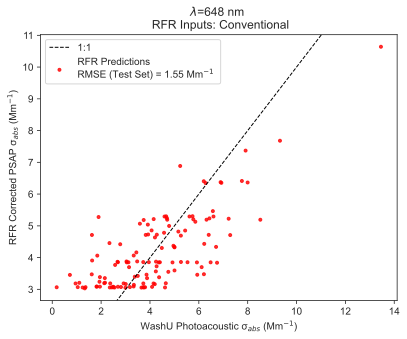

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=529nm   0.42         1.460000
Testing@$\lambda$=529nm   -3.83         1.648932

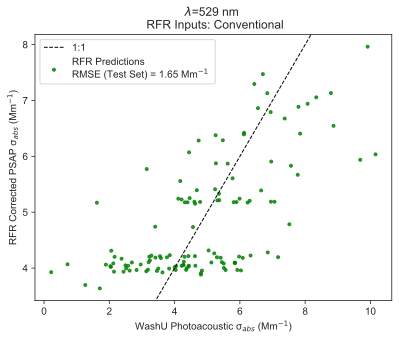

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=464nm   0.38         2.010000
Testing@$\lambda$=464nm    0.65         2.233213

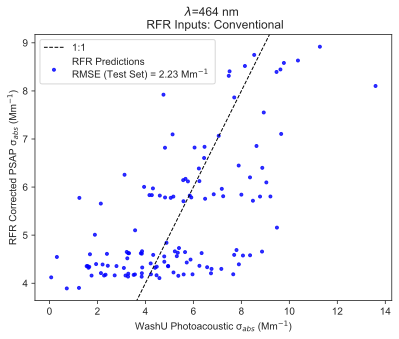

In [43]:
######### RFR with Conventional Inputs ONLY####################################
###############################################################################
# ALL VARIABLES: ["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc", "residual_absorption"]

from sklearn.model_selection import cross_val_score


#6 ############## Code for Machine Learning Approach to Predict B_abs (Inputs: Conventional)  ####################
#  // Change wavelenght# and _RBG# Code to get different results for different Wavelengths

display("RFR Inputs: Conventional")
#4 ############## Code to compute Virukulla Coefficients using DOE Data ####################
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
SP2_df  = SP2_df0[["time", "sp2_rbc_conc"]]


############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)
SP2_df["time"]  = pd.to_datetime(SP2_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()
SP2_1hr_df  = SP2_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df, SP2_1hr_df], axis=1)

# Convert SP2 concentrations to Absorption in Mm-1 and get # Residual absorption of PASS1047 non-BC
Combined_df["sp2_rbc_absorption"] = Combined_df["sp2_rbc_conc"]*10**(-3)*4.97 #*1.15 #15% Pumping up of the absoprtion
Combined_df["residual_absorption"] = (Combined_df["absorption_coefficient_1047nm"] - Combined_df["sp2_rbc_absorption"])


# display(f"1. Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df["absorption_coefficient_721nm"].fillna(method='ffill', inplace=True)
# display(f"1. FFILLED: Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Look at the BoxPlot distribution of data and set upper limit | Now: 50
Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
### ACTIVATE THE BELOW FILTERS FOR BETTER RESOLUTION IN FEATURE IMPORTANCE PLOTS ###
Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["sp2_rbc_conc"]>200] = np.nan

# Combined_df[Combined_df["residual_absorption"]<0] = np.nan # check with(I think) and without this
# Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan


Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# display(f"2. Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df.dropna(inplace=True)
# display(f"2. RMVD: Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required

# Compute Total Organic + Inorganic Particle concentration
Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@464"] = 0.015
Combined_df["s@529"] = 0.017
Combined_df["s@648"] = 0.022

Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# display(Combined_df.head())
# display(Combined_df.columns)
################################################# PLOTS #################################################

# 6.1 For Red Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@648"
y=Combined_df["Ba_PASS@648"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total", "Ba_PASS@648"]], hue="Ba_PASS@648")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2)# min_samples_leaf=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)



###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error') # Does not change regressor variable!
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=648nm", "Testing@$\lambda$=648nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)

plt.title("$\lambda$=648 nm \n RFR Inputs: Conventional") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional@648.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor
###############################
# 6.2 For Green Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@529"
y=Combined_df["Ba_PASS@529"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.01) # 70% training and 30% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total", "Ba_PASS@529"]], hue="Ba_PASS@529")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42


#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=529nm", "Testing@$\lambda$=529nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=529 nm \n RFR Inputs: Conventional") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional@529.png', bbox_inches='tight', dpi=600)
plt.show()


del regressor
###############################
# 6.3 For Blue Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@464"
y=Combined_df["Ba_PASS@464"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total", "Ba_PASS@464"]], hue="Ba_PASS@464")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=464nm", "Testing@$\lambda$=464nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=464 nm \n RFR Inputs: Conventional") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional@464.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor

'RFR Inputs: Conventional and SP2'

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=648nm   0.54         1.360000
Testing@$\lambda$=648nm    0.66         1.549441

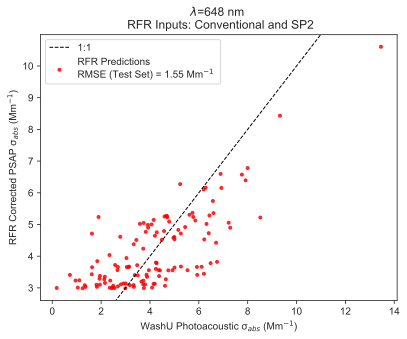

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=529nm   0.45         1.430000
Testing@$\lambda$=529nm   -4.75         1.625633

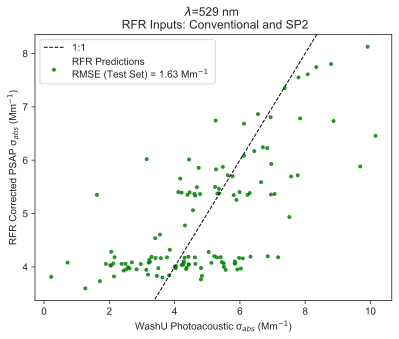

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=464nm   0.40         1.970000
Testing@$\lambda$=464nm   -1.72         2.230791

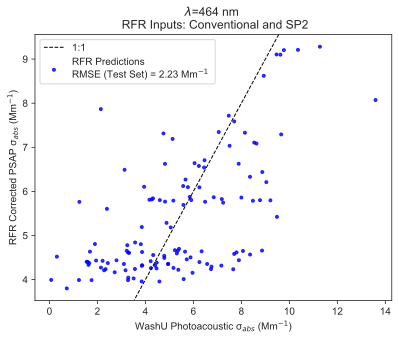

In [44]:
######### RFR with Conventional and SP2 Inputs ONLY####################################
###############################################################################
# ALL VARIABLES: ["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc", "residual_absorption"]
from sklearn.model_selection import cross_val_score


#6 ############## Code for Machine Learning Approach to Predict B_abs (Inputs: Conventional and SP2)  ####################
#  // Change wavelenght# and _RBG# Code to get different results for different Wavelengths

display("RFR Inputs: Conventional and SP2")
#4 ############## Code to compute Virukulla Coefficients using DOE Data ####################
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
SP2_df  = SP2_df0[["time", "sp2_rbc_conc"]]


############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)
SP2_df["time"]  = pd.to_datetime(SP2_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()
SP2_1hr_df  = SP2_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df, SP2_1hr_df], axis=1)

# Convert SP2 concentrations to Absorption in Mm-1 and get # Residual absorption of PASS1047 non-BC
Combined_df["sp2_rbc_absorption"] = Combined_df["sp2_rbc_conc"]*10**(-3)*4.97 #*1.15 #15% Pumping up of the absoprtion
Combined_df["residual_absorption"] = (Combined_df["absorption_coefficient_1047nm"] - Combined_df["sp2_rbc_absorption"])


# display(f"1. Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df["absorption_coefficient_721nm"].fillna(method='ffill', inplace=True)
# display(f"1. FFILLED: Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Look at the BoxPlot distribution of data and set upper limit | Now: 50
Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
### ACTIVATE THE BELOW FILTERS FOR BETTER RESOLUTION IN FEATURE IMPORTANCE PLOTS ###
Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["sp2_rbc_conc"]>200] = np.nan

# Combined_df[Combined_df["residual_absorption"]<0] = np.nan # check with(I think) and without this
# Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan


Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# display(f"2. Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df.dropna(inplace=True)
# display(f"2. RMVD: Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required

# Compute Total Organic + Inorganic Particle concentration
Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@464"] = 0.015
Combined_df["s@529"] = 0.017
Combined_df["s@648"] = 0.022

Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# display(Combined_df.head())
# display(Combined_df.columns)
################################################# PLOTS #################################################

# 6.1 For Red Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "sp2_rbc_conc"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@648"
y=Combined_df["Ba_PASS@648"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total", "Ba_PASS@648"]], hue="Ba_PASS@648")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2)# min_samples_leaf=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)



###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error') # Does not change regressor variable!
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=648nm", "Testing@$\lambda$=648nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)

plt.title("$\lambda$=648 nm \n RFR Inputs: Conventional and SP2") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional and SP2@648.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor
###############################
# 6.2 For Green Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "sp2_rbc_conc"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@529"
y=Combined_df["Ba_PASS@529"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.01) # 70% training and 30% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total", "Ba_PASS@529"]], hue="Ba_PASS@529")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42


#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=529nm", "Testing@$\lambda$=529nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=529 nm \n RFR Inputs: Conventional and SP2") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional and SP2@529.png', bbox_inches='tight', dpi=600)
plt.show()


del regressor
###############################
# 6.3 For Blue Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "sp2_rbc_conc"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@464"
y=Combined_df["Ba_PASS@464"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total", "Ba_PASS@464"]], hue="Ba_PASS@464")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=464nm", "Testing@$\lambda$=464nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=464 nm \n RFR Inputs: Conventional and SP2") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional and SP2@464.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor

'RFR Inputs: Conventional and ACSM'

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=648nm   0.54         1.370000
Testing@$\lambda$=648nm  -26.51         1.592105

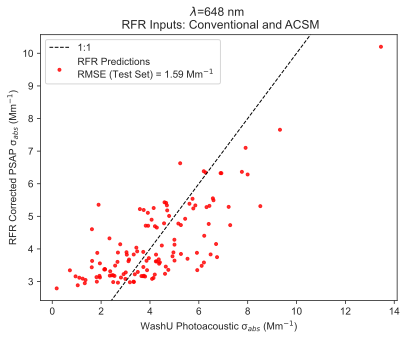

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=529nm   0.44         1.430000
Testing@$\lambda$=529nm   -0.36         1.649713

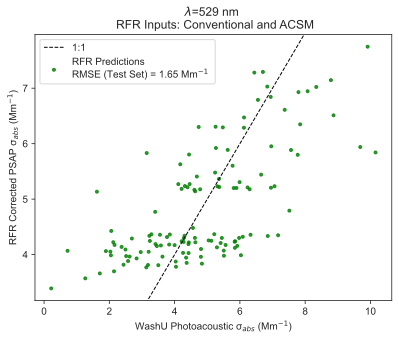

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=464nm   0.40         1.990000
Testing@$\lambda$=464nm    0.97         2.252307

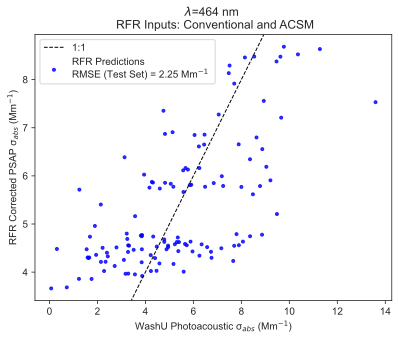

In [45]:
######### RFR with Conventional and ACSM Inputs ONLY####################################
###############################################################################
# ALL VARIABLES: ["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc", "residual_absorption"]
from sklearn.model_selection import cross_val_score


#6 ############## Code for Machine Learning Approach to Predict B_abs (Inputs: Conventional and ACSM)  ####################
#  // Change wavelenght# and _RBG# Code to get different results for different Wavelengths

display("RFR Inputs: Conventional and ACSM")
#4 ############## Code to compute Virukulla Coefficients using DOE Data ####################
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
SP2_df  = SP2_df0[["time", "sp2_rbc_conc"]]


############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)
SP2_df["time"]  = pd.to_datetime(SP2_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()
SP2_1hr_df  = SP2_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df, SP2_1hr_df], axis=1)

# Convert SP2 concentrations to Absorption in Mm-1 and get # Residual absorption of PASS1047 non-BC
Combined_df["sp2_rbc_absorption"] = Combined_df["sp2_rbc_conc"]*10**(-3)*4.97 #*1.15 #15% Pumping up of the absoprtion
Combined_df["residual_absorption"] = (Combined_df["absorption_coefficient_1047nm"] - Combined_df["sp2_rbc_absorption"])


# display(f"1. Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df["absorption_coefficient_721nm"].fillna(method='ffill', inplace=True)
# display(f"1. FFILLED: Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Look at the BoxPlot distribution of data and set upper limit | Now: 50
Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
### ACTIVATE THE BELOW FILTERS FOR BETTER RESOLUTION IN FEATURE IMPORTANCE PLOTS ###
Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["sp2_rbc_conc"]>200] = np.nan

# Combined_df[Combined_df["residual_absorption"]<0] = np.nan # check with(I think) and without this
# Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan


Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# display(f"2. Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df.dropna(inplace=True)
# display(f"2. RMVD: Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required

# Compute Total Organic + Inorganic Particle concentration
Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@464"] = 0.015
Combined_df["s@529"] = 0.017
Combined_df["s@648"] = 0.022

Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# display(Combined_df.head())
# display(Combined_df.columns)
################################################# PLOTS #################################################

# 6.1 For Red Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@648"
y=Combined_df["Ba_PASS@648"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total", "Ba_PASS@648"]], hue="Ba_PASS@648")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2)# min_samples_leaf=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)



###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error') # Does not change regressor variable!
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=648nm", "Testing@$\lambda$=648nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)

plt.title("$\lambda$=648 nm \n RFR Inputs: Conventional and ACSM") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional and ACSM@648.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor
###############################
# 6.2 For Green Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@529"
y=Combined_df["Ba_PASS@529"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.01) # 70% training and 30% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total", "Ba_PASS@529"]], hue="Ba_PASS@529")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42


#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=529nm", "Testing@$\lambda$=529nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=529 nm \n RFR Inputs: Conventional and ACSM") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional and ACSM@529.png', bbox_inches='tight', dpi=600)
plt.show()


del regressor
###############################
# 6.3 For Blue Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@464"
y=Combined_df["Ba_PASS@464"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total", "Ba_PASS@464"]], hue="Ba_PASS@464")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=464nm", "Testing@$\lambda$=464nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=464 nm \n RFR Inputs: Conventional and ACSM") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional and ACSM@464.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor

'RFR Inputs: Conventional, BrC_residual_abs@1047, and ACSM'

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=648nm   0.68         1.150000
Testing@$\lambda$=648nm  -24.86         1.426059

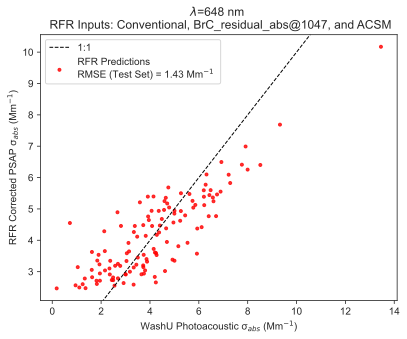

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=529nm   0.47          1.40000
Testing@$\lambda$=529nm   -0.10          1.64792

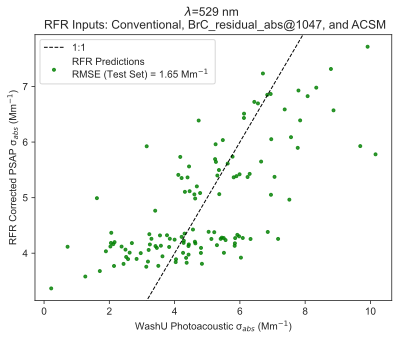

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=464nm   0.43         1.900000
Testing@$\lambda$=464nm  -11.36         2.244364

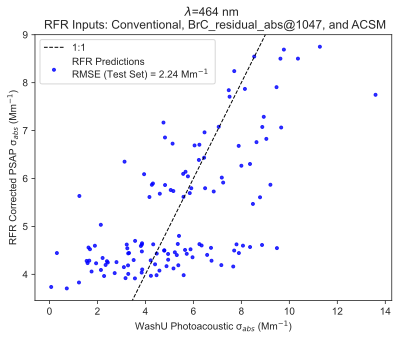

In [46]:
######### RFR with Conventional, BrC_residual_abs@1047, and ACSM Inputs ONLY####################################
###############################################################################
# ALL VARIABLES: ["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc", "residual_absorption"]

from sklearn.model_selection import cross_val_score


#6 ############## Code for Machine Learning Approach to Predict B_abs (Inputs: Conventional, BrC_residual_abs@1047, and ACSM)  ####################
#  // Change wavelenght# and _RBG# Code to get different results for different Wavelengths

display("RFR Inputs: Conventional, BrC_residual_abs@1047, and ACSM")
#4 ############## Code to compute Virukulla Coefficients using DOE Data ####################
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
SP2_df  = SP2_df0[["time", "sp2_rbc_conc"]]


############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)
SP2_df["time"]  = pd.to_datetime(SP2_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()
SP2_1hr_df  = SP2_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df, SP2_1hr_df], axis=1)

# Convert SP2 concentrations to Absorption in Mm-1 and get # Residual absorption of PASS1047 non-BC
Combined_df["sp2_rbc_absorption"] = Combined_df["sp2_rbc_conc"]*10**(-3)*4.97 #*1.15 #15% Pumping up of the absoprtion
Combined_df["residual_absorption"] = (Combined_df["absorption_coefficient_1047nm"] - Combined_df["sp2_rbc_absorption"])


# display(f"1. Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df["absorption_coefficient_721nm"].fillna(method='ffill', inplace=True)
# display(f"1. FFILLED: Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Look at the BoxPlot distribution of data and set upper limit | Now: 50
Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
### ACTIVATE THE BELOW FILTERS FOR BETTER RESOLUTION IN FEATURE IMPORTANCE PLOTS ###
Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["sp2_rbc_conc"]>200] = np.nan

# Combined_df[Combined_df["residual_absorption"]<0] = np.nan # check with(I think) and without this
# Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan


Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# display(f"2. Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df.dropna(inplace=True)
# display(f"2. RMVD: Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required

# Compute Total Organic + Inorganic Particle concentration
Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@464"] = 0.015
Combined_df["s@529"] = 0.017
Combined_df["s@648"] = 0.022

Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# display(Combined_df.head())
# display(Combined_df.columns)
################################################# PLOTS #################################################

# 6.1 For Red Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "residual_absorption"]]#, "residual_absorption"  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@648"
y=Combined_df["Ba_PASS@648"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total", "Ba_PASS@648"]], hue="Ba_PASS@648")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2)# min_samples_leaf=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)



###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error') # Does not change regressor variable!
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=648nm", "Testing@$\lambda$=648nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)

plt.title("$\lambda$=648 nm \n RFR Inputs: Conventional, BrC_residual_abs@1047, and ACSM") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional, BrC_residual_abs@1047, and ACSM@648.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor
###############################
# 6.2 For Green Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "residual_absorption"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@529"
y=Combined_df["Ba_PASS@529"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.01) # 70% training and 30% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total", "Ba_PASS@529"]], hue="Ba_PASS@529")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42


#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=529nm", "Testing@$\lambda$=529nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=529 nm \n RFR Inputs: Conventional, BrC_residual_abs@1047, and ACSM") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional, BrC_residual_abs@1047, and ACSM@529.png', bbox_inches='tight', dpi=600)
plt.show()


del regressor
###############################
# 6.3 For Blue Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "residual_absorption"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@464"
y=Combined_df["Ba_PASS@464"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total", "Ba_PASS@464"]], hue="Ba_PASS@464")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=464nm", "Testing@$\lambda$=464nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=464 nm \n RFR Inputs: Conventional, BrC_residual_abs@1047, and ACSM") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional, BrC_residual_abs@1047, and ACSM@464.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor

'RFR Inputs: Conventional, SP2, and ACSM'

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=648nm   0.56         1.340000
Testing@$\lambda$=648nm   -2.52         1.592476

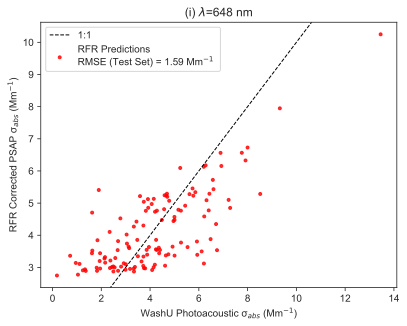

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=529nm   0.46          1.41000
Testing@$\lambda$=529nm    0.69          1.63593

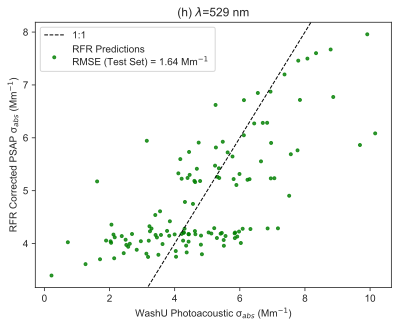

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=464nm    0.43         1.930000
Testing@$\lambda$=464nm  -175.85         2.239153

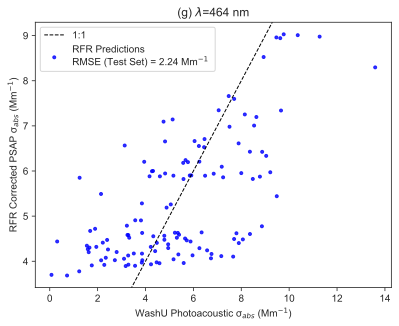

In [47]:
######### RFR with Conventional, SP2, and ACSM Inputs ONLY####################################
###############################################################################
# ALL VARIABLES: ["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc", "residual_absorption"]

from sklearn.model_selection import cross_val_score


#6 ############## Code for Machine Learning Approach to Predict B_abs (Inputs: Conventional, SP2, and ACSM)  ####################
#  // Change wavelenght# and _RBG# Code to get different results for different Wavelengths

display("RFR Inputs: Conventional, SP2, and ACSM")
#4 ############## Code to compute Virukulla Coefficients using DOE Data ####################
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
SP2_df  = SP2_df0[["time", "sp2_rbc_conc"]]


############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)
SP2_df["time"]  = pd.to_datetime(SP2_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()
SP2_1hr_df  = SP2_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df, SP2_1hr_df], axis=1)

# Convert SP2 concentrations to Absorption in Mm-1 and get # Residual absorption of PASS1047 non-BC
Combined_df["sp2_rbc_absorption"] = Combined_df["sp2_rbc_conc"]*10**(-3)*4.97 #*1.15 #15% Pumping up of the absoprtion
Combined_df["residual_absorption"] = (Combined_df["absorption_coefficient_1047nm"] - Combined_df["sp2_rbc_absorption"])


# display(f"1. Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df["absorption_coefficient_721nm"].fillna(method='ffill', inplace=True)
# display(f"1. FFILLED: Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Look at the BoxPlot distribution of data and set upper limit | Now: 50
Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
### ACTIVATE THE BELOW FILTERS FOR BETTER RESOLUTION IN FEATURE IMPORTANCE PLOTS ###
Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["sp2_rbc_conc"]>200] = np.nan

# Combined_df[Combined_df["residual_absorption"]<0] = np.nan # check with(I think) and without this
# Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan


Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# display(f"2. Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df.dropna(inplace=True)
# display(f"2. RMVD: Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required

# Compute Total Organic + Inorganic Particle concentration
Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@464"] = 0.015
Combined_df["s@529"] = 0.017
Combined_df["s@648"] = 0.022

Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# display(Combined_df.head())
# display(Combined_df.columns)
################################################# PLOTS #################################################

# 6.1 For Red Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc"]]#, "residual_absorption"  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@648"
y=Combined_df["Ba_PASS@648"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total", "Ba_PASS@648"]], hue="Ba_PASS@648")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2)# min_samples_leaf=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)



###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error') # Does not change regressor variable!
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=648nm", "Testing@$\lambda$=648nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)

plt.title("(i) $\lambda$=648 nm") #\n RFR Inputs: Conventional, SP2, and ACSM
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

TestRMSE_red = TestRMSE
regressor_red = regressor
X_red = X
sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional, SP2, and ACSM@648.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor
###############################
# 6.2 For Green Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@529"
y=Combined_df["Ba_PASS@529"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.01) # 70% training and 30% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total", "Ba_PASS@529"]], hue="Ba_PASS@529")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42


#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()


#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=529nm", "Testing@$\lambda$=529nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("(h) $\lambda$=529 nm") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

TestRMSE_green = TestRMSE
regressor_green = regressor
X_green = X
sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional, SP2, and ACSM@529.png', bbox_inches='tight', dpi=600)
plt.show()


del regressor
###############################
# 6.3 For Blue Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@464"
y=Combined_df["Ba_PASS@464"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01) # 70% training and 30% test
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total", "Ba_PASS@464"]], hue="Ba_PASS@464")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
# TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)
# Perform 5-fold cross-validation and calculate RMSE for each fold
cv_scores = -cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
# Calculate the average RMSE across all folds
TestRMSE = cv_scores.mean()

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=464nm", "Testing@$\lambda$=464nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("(g) $\lambda$=464 nm") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

TestRMSE_blue = TestRMSE
regressor_blue = regressor
X_blue = X
sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig(r'ML_temp\ML_Conventional, SP2, and ACSM@464.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor

In [48]:
########## ALL WAVELENGTH COMBINED PLOT

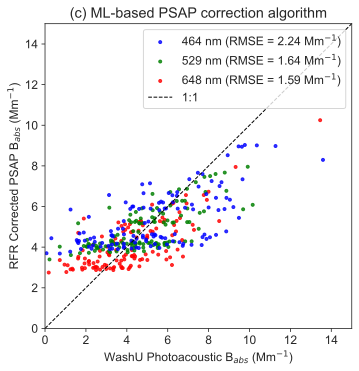

[2.2391532985148417, 1.6359304344094017, 1.5924755739446872]

In [65]:
# Combined plot for all wavelengths
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'

# Set the global font size to match the figure title size
plt.rcParams.update({'font.size': 12})  # Adjust the size as needed

# Assume all the variables are defined and models are trained for each wavelength as per the previous steps

# Initialize a new plot
plt.figure(figsize=(5.5, 5.5))

# Red wavelength
sns.regplot(x=Combined_df["Ba_PASS@648"], y=regressor_red.predict(X_red), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color": "black"}, marker=".", ci=None, fit_reg=False, label=f"648 nm (RMSE = {np.round(TestRMSE_red, 2)} Mm$^{{-1}}$)")

# Green wavelength
sns.regplot(x=Combined_df["Ba_PASS@529"], y=regressor_green.predict(X_green), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color": "black"}, marker=".", ci=None, fit_reg=False, label=f"529 nm (RMSE = {np.round(TestRMSE_green, 2)} Mm$^{{-1}}$)")

# Blue wavelength
sns.regplot(x=Combined_df["Ba_PASS@464"], y=regressor_blue.predict(X_blue), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color": "black"}, marker=".", ci=None, fit_reg=False, label=f"464 nm (RMSE = {np.round(TestRMSE_blue, 2)} Mm$^{{-1}}$)")

# Add the 1:1 line
plt.xlim(0, 15)
plt.ylim(0, 15)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")

# Labels and Title
plt.xlabel(r"WashU Photoacoustic B$_{abs}$ (Mm$^{-1}$)")
plt.ylabel(r"RFR Corrected PSAP B$_{abs}$ (Mm$^{-1}$)")
plt.title("(c) ML-based PSAP correction algorithm")

# Adjust legend to show the labels correctly
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0, 3]  # Order might change depending on how many entries are in the legend
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right')

plt.savefig(r'Combined_ML_Conventional, SP2, and ACSM.png', bbox_inches='tight', dpi=600)
plt.show()

# RMSE List
RFR_RMSE_List = [TestRMSE_blue, TestRMSE_green, TestRMSE_red]
display(RFR_RMSE_List)

In [50]:
#*#

In [51]:
## Bar Chart for RMSE Values

In [52]:
display(PASSvsPSAP_RMSE_List, Analytical_RMSE_List, RFR_RMSE_List)

[10.870191725766356, 9.427486364632943, 6.883201684162224]

[4.569508504864214, 3.685617505316555, 2.687839029160072]

[2.2391532985148417, 1.6359304344094017, 1.5924755739446872]

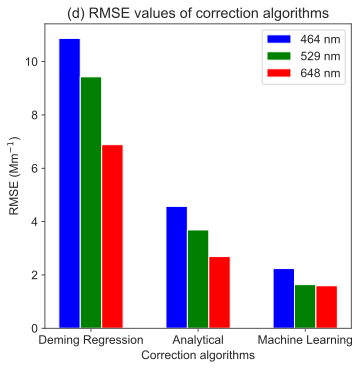

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Set the global font size to match the figure title size
plt.rcParams.update({'font.size': 12})  # Adjust the size as needed

# Data
methods = ["Deming Regression", "Analytical", "Machine Learning"]
wavelengths = ["464", "529", "648"]
colors = ["b", "g", "r"]

# RMSE data for each method
# PASSvsPSAP_RMSE_List = [9.952082355686262, 8.954628741867133, 6.048879187741326]
# Analytical_RMSE_List = [4.569508504864214, 3.685617505316555, 2.687839029160072]
# RFR_RMSE_List = [2.2442049499155785, 1.631485534696567, 1.5957953002410348]

# Combine the data into a list of lists for easier iteration
data = [PASSvsPSAP_RMSE_List, Analytical_RMSE_List, RFR_RMSE_List]

# Number of groups and number of bars in each group
n_groups = len(methods)
n_bars = len(wavelengths)

# The x position of bars
bar_width = 0.2  # width of the bars
index = np.arange(n_groups)  # the label locations

# Set figure size
plt.figure(figsize=(5.5, 5.5))

# Create the bars
for i in range(n_bars):
    # Calculate the position of each bar in the current group
    bar_pos = index + i * bar_width
    # Plot each subcategory bar with a different color
    plt.bar(bar_pos, [method[i] for method in data], bar_width, label=f'{wavelengths[i]} nm', color=colors[i])

# Formatting
plt.ylabel('RMSE (Mm$^{{-1}}$)')
plt.xlabel('Correction algorithms')
plt.title('(d) RMSE values of correction algorithms')
plt.xticks(index + bar_width, methods)
plt.legend(loc='upper right')

# Save plot
plt.savefig(r'Combined_RMSE_BarPlot.png', bbox_inches='tight', dpi=600)

# Show the plot
plt.show()


'RFR Inputs: Conventional+ACSM+SP2+ResidualAbs'

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=648nm   0.72             0.99
Testing@$\lambda$=648nm    0.46             1.68

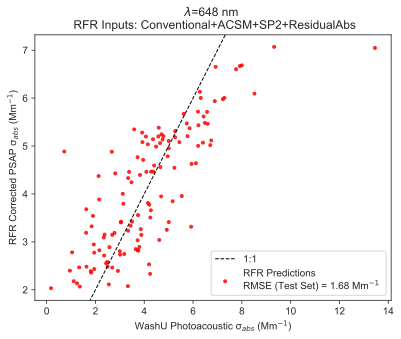

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=529nm   0.50             1.31
Testing@$\lambda$=529nm    0.31             1.71

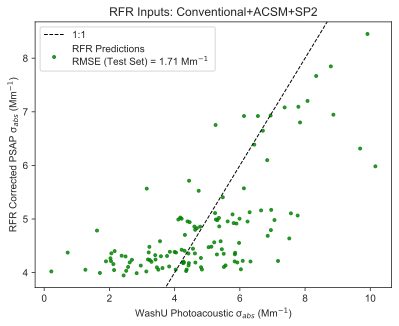

R$^2$  RMSE(Mm$^{-1}$)
Training@$\lambda$=464nm   0.48             1.90
Testing@$\lambda$=464nm   -0.15             2.44

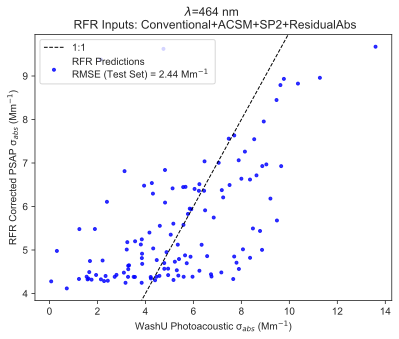

In [54]:
#6 ############## Code for Machine Learning Approach to Predict B_abs (Inputs: Conventional+ACSM+SP2+ResidualAbs)  ####################
#  // Change wavelenght# and _RBG# Code to get different results for different Wavelengths

display("RFR Inputs: Conventional+ACSM+SP2+ResidualAbs")
#4 ############## Code to compute Virukulla Coefficients using DOE Data ####################
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'

# Create new df with extracting USEFUL variables only
PASS_df = PASS_df0[["time", "absorption_coefficient_405nm", "absorption_coefficient_721nm", "absorption_coefficient_1047nm"]]
PSAP_df = PSAP_df0[["time","Ba_B_PSAP3W", "Ba_G_PSAP3W", "Ba_R_PSAP3W", "transmittance_B", "transmittance_G", "transmittance_R"]]
NEPH_df = NEPH_df0[["time","Bs_B_Dry_Neph3W", "Bs_G_Dry_Neph3W", "Bs_R_Dry_Neph3W"]]
ACSM_df = ACSM_df0[["time", "total_organics", "sulfate", "ammonium", "nitrate", "chloride"]]
SP2_df  = SP2_df0[["time", "sp2_rbc_conc"]]


############ Uncorrecting Bond's Auto Correction in Radiance Research's PSAP Absorption values ############
PSAP_df["Ba_B_PSAP3W"] = PSAP_df0["Ba_B_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_B"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_G_PSAP3W"] = PSAP_df0["Ba_G_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_G"])+0.866)) # B1999-Eqn(3)
PSAP_df["Ba_R_PSAP3W"] = PSAP_df0["Ba_R_PSAP3W"] / (1/(1.317*(PSAP_df0["transmittance_R"])+0.866)) # B1999-Eqn(3)
############################################################################################################


# Convert the time to datetime format
import datetime
PASS_df["time"] = pd.to_datetime(PASS_df["time"], infer_datetime_format=True)
PSAP_df["time"] = pd.to_datetime(PSAP_df["time"], infer_datetime_format=True)
NEPH_df["time"] = pd.to_datetime(NEPH_df["time"], infer_datetime_format=True)
ACSM_df["time"] = pd.to_datetime(ACSM_df["time"], infer_datetime_format=True)
SP2_df["time"]  = pd.to_datetime(SP2_df["time"], infer_datetime_format=True)


# Convert all DataFrames into 1Hour Average Data Rows
PASS_1hr_df = PASS_df.resample('60min', on='time').mean()
PSAP_1hr_df = PSAP_df.resample('60min', on='time').mean()
NEPH_1hr_df = NEPH_df.resample('60min', on='time').mean()
ACSM_1hr_df = ACSM_df.resample('60min', on='time').mean()
SP2_1hr_df  = SP2_df.resample('60min', on='time').mean()


# Combine the DataFrames and Fiter the dataframe to TRIM to keep (0<Babs>8)
Combined_df = pd.concat([PASS_1hr_df, PSAP_1hr_df, NEPH_1hr_df, ACSM_1hr_df, SP2_1hr_df], axis=1)

# Convert SP2 concentrations to Absorption in Mm-1 and get # Residual absorption of PASS1047 non-BC
Combined_df["sp2_rbc_absorption"] = Combined_df["sp2_rbc_conc"]*10**(-3)*4.97 #*1.15 #15% Pumping up of the absoprtion
Combined_df["residual_absorption"] = (Combined_df["absorption_coefficient_1047nm"] - Combined_df["sp2_rbc_absorption"])


# display(f"1. Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df["absorption_coefficient_721nm"].fillna(method='ffill', inplace=True)
# display(f"1. FFILLED: Combined_df Natural nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Look at the BoxPlot distribution of data and set upper limit | Now: 50
Combined_df[Combined_df["absorption_coefficient_405nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_721nm"]>100] = np.nan
Combined_df[Combined_df["absorption_coefficient_1047nm"]>100] = np.nan
### ACTIVATE THE BELOW FILTERS FOR BETTER RESOLUTION IN FEATURE IMPORTANCE PLOTS ###
Combined_df[Combined_df["Ba_B_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_G_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["Ba_R_PSAP3W"]>100] = np.nan
Combined_df[Combined_df["sp2_rbc_conc"]>200] = np.nan

# Combined_df[Combined_df["residual_absorption"]<0] = np.nan # check with(I think) and without this
# Combined_df[Combined_df["Bs_B_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_G_Dry_Neph3W"]>100] = np.nan
# Combined_df[Combined_df["Bs_R_Dry_Neph3W"]>100] = np.nan


Combined_df[Combined_df<=0] = np.nan # For removing negative abs values
# display(f"2. Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")
Combined_df.dropna(inplace=True)
# display(f"2. RMVD: Neg nans: {Combined_df.isna().sum()} shape: {Combined_df.shape}")

# Special Offset correction for PASS-721nm to keep AAE values positive
Combined_df["absorption_coefficient_721nm"] = Combined_df["absorption_coefficient_721nm"] + PASS_721_Offset_add_required

# Compute Total Organic + Inorganic Particle concentration
Combined_df["total"] =  Combined_df["total_organics"]+Combined_df["sulfate"]+Combined_df["ammonium"]+Combined_df["nitrate"]+Combined_df["chloride"]


# Compute Angstrom Exponents for PASS Data
Combined_df["AAE_PASS_405_721"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_721nm) / np.log(405/721)
Combined_df["AAE_PASS_721_1047"] = -1*np.log(Combined_df.absorption_coefficient_721nm/Combined_df.absorption_coefficient_1047nm) / np.log(721/1047)
Combined_df["AAE_PASS_405_1047"] = -1*np.log(Combined_df.absorption_coefficient_405nm/Combined_df.absorption_coefficient_1047nm) / np.log(405/1047)

# Extrapolate PASS Data to PSAP Wavelengths#(464,529,648)
Combined_df["Ba_PASS@464"] = Combined_df["absorption_coefficient_405nm"]*(464/405)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@529"] = Combined_df["absorption_coefficient_721nm"]*(529/721)**(-1*Combined_df["AAE_PASS_405_721"])
Combined_df["Ba_PASS@648"] = Combined_df["absorption_coefficient_1047nm"]*(648/1047)**(-1*Combined_df["AAE_PASS_405_1047"])

# Compute Angstrom Exponents for NEPH Data
Combined_df["SAE_NEPH_450_550"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_G_Dry_Neph3W) / np.log(450/550)
Combined_df["SAE_NEPH_550_700"] = -1*np.log(Combined_df.Bs_G_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(550/700)
Combined_df["SAE_NEPH_450_700"] = -1*np.log(Combined_df.Bs_B_Dry_Neph3W/Combined_df.Bs_R_Dry_Neph3W) / np.log(450/700)

# Extrapolate NEPH Data to PSAP Wavelengths#(464,529,648)
Combined_df["Bs_NEPH@464"] = Combined_df["Bs_B_Dry_Neph3W"]*(464/450)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@529"] = Combined_df["Bs_G_Dry_Neph3W"]*(529/550)**(-1*Combined_df["SAE_NEPH_450_550"])
Combined_df["Bs_NEPH@648"] = Combined_df["Bs_R_Dry_Neph3W"]*(648/700)**(-1*Combined_df["SAE_NEPH_550_700"])

# Compute Natural Log of PSAP Transmittance Data at all Wavelengths
Combined_df["ln(Tr)@464"] = np.log(Combined_df["transmittance_B"])
Combined_df["ln(Tr)@529"] = np.log(Combined_df["transmittance_G"])
Combined_df["ln(Tr)@648"] = np.log(Combined_df["transmittance_R"])

# Compute Measured Correction Function f_measured(Tr) = Y ################# CHANGED ##############
###Changed2010Paper are values of s(lambda) in Virkkula Paper Eqn(6)
Combined_df["s@464"] = 0.015
Combined_df["s@529"] = 0.017
Combined_df["s@648"] = 0.022

Combined_df["f(Tr)@464"] = ( Combined_df["Ba_PASS@464"] + Combined_df["s@464"]*Combined_df["Bs_NEPH@464"] )/ Combined_df["Ba_B_PSAP3W"]
Combined_df["f(Tr)@529"] = ( Combined_df["Ba_PASS@529"] + Combined_df["s@529"]*Combined_df["Bs_NEPH@529"] )/ Combined_df["Ba_G_PSAP3W"]
Combined_df["f(Tr)@648"] = ( Combined_df["Ba_PASS@648"] + Combined_df["s@648"]*Combined_df["Bs_NEPH@648"] )/ Combined_df["Ba_R_PSAP3W"]

# Compute w0(=SSA) for all Wavelenghts (Neph_scat/Neph_scat+PASS_abs)
Combined_df["w0@464"] = (Combined_df["Bs_NEPH@464"]/(Combined_df["Bs_NEPH@464"] + Combined_df["Ba_PASS@464"]))
Combined_df["w0@529"] = (Combined_df["Bs_NEPH@529"]/(Combined_df["Bs_NEPH@529"] + Combined_df["Ba_PASS@529"]))
Combined_df["w0@648"] = (Combined_df["Bs_NEPH@648"]/(Combined_df["Bs_NEPH@648"] + Combined_df["Ba_PASS@648"]))


# Compute Product of w0(=SSA) and ln(Tr) for all Wavelengths = X2 = w0*ln(Tr)
Combined_df["w0*ln(Tr)@464"] = Combined_df["w0@464"]*Combined_df["ln(Tr)@464"]
Combined_df["w0*ln(Tr)@529"] = Combined_df["w0@529"]*Combined_df["ln(Tr)@529"]
Combined_df["w0*ln(Tr)@648"] = Combined_df["w0@648"]*Combined_df["ln(Tr)@648"]

# display(Combined_df.head())
# display(Combined_df.columns)
################################################# PLOTS #################################################

# 6.1 For Red Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc", "residual_absorption"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@648"
y=Combined_df["Ba_PASS@648"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # 70% training and 30% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_R_PSAP3W", "transmittance_R", "Bs_NEPH@648", "total", "Ba_PASS@648"]], hue="Ba_PASS@648")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2)# min_samples_leaf=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=648nm", "Testing@$\lambda$=648nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)

plt.title("$\lambda$=648 nm \n RFR Inputs: Conventional+ACSM+SP2+ResidualAbs") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "r"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('ML@648.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor
###############################
# 6.2 For Green Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc", "residual_absorption"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@529"
y=Combined_df["Ba_PASS@529"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # 70% training and 30% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.01) # 70% training and 30% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_G_PSAP3W", "transmittance_G", "Bs_NEPH@529", "total", "Ba_PASS@529"]], hue="Ba_PASS@529")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42


#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=529nm", "Testing@$\lambda$=529nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=529 nm \n RFR Inputs: Conventional+ACSM+SP2+ResidualAbs") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "g"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.title("RFR Inputs: Conventional+ACSM+SP2")
plt.savefig('ML@529.png', bbox_inches='tight', dpi=600)
plt.show()


del regressor
###############################
# 6.3 For Blue Wavelengths
from string import ascii_letters
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'svg'
pd.options.mode.chained_assignment = None  # default='warn'



###
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X=Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total_organics", "sulfate", "ammonium", "nitrate", "chloride", "sp2_rbc_conc", "residual_absorption"]]  # Features Required: "N_TOTAL","GEO_MEAN", "GEO_STD", "w0@464"
y=Combined_df["Ba_PASS@464"]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # 70% training and 30% test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.01) # 99% training and 1% test


###
# Pairplot the data_df
# sns.pairplot(Combined_df[["Ba_B_PSAP3W", "transmittance_B", "Bs_NEPH@464", "total", "Ba_PASS@464"]], hue="Ba_PASS@464")
# plt.show()


###
# Supervised Machine Learning: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Initialize the regressor model
regressor =RandomForestRegressor(n_estimators=1000, max_depth=2) #random_state=42

#Train the model using the training sets
regressor.fit(X_train,y_train)

#Using Trained Model: Predict the values from Test set
y_pred=regressor.predict(X_test)

###
# Model Metrics Calculations
#Coefficient of determination R2 of the prediction(For Unseen Data X_test)
TestR2 = round(regressor.score(X_test, y_test, sample_weight=None), 2)
#Root Mean Squared Error (For Unseen Data X_test)
from sklearn.metrics import mean_squared_error
TestRMSE = round(mean_squared_error(y_test, regressor.predict(X_test), squared=False), 2)

#Coefficient of determination R2 of the prediction(For SEEN Data X_test)
TrainR2 = round(regressor.score(X_train, y_train, sample_weight=None), 2)
#Root Mean Squared Error (For SEEN Data X_test)
from sklearn.metrics import mean_squared_error
TrainRMSE = round(mean_squared_error(y_train, regressor.predict(X_train), squared=False), 2)

#Metrics DataFrame Table
metrics_df = pd.DataFrame(np.array([[TrainR2, TrainRMSE], [TestR2, TestRMSE]]),columns=["R$^2$", "RMSE(Mm$^{-1}$)"], index=["Training@$\lambda$=464nm", "Testing@$\lambda$=464nm"])
display(metrics_df)


###
# Visualize the y_pred(Over UnseenData Model Predicted B_ABS_PA) with the y_test(True B_ABS_PA)
plt.title("$\lambda$=464 nm \n RFR Inputs: Conventional+ACSM+SP2+ResidualAbs") #
# sns.regplot(x=y_test, y=regressor.predict(X_test), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #

sns.regplot(x=y, y=regressor.predict(X), data=Combined_df, scatter_kws={"color": "b"}, line_kws={"color":"black"}, marker=".", ci=None, fit_reg=False, label="RFR Predictions\nRMSE (Test Set) = "+str(np.round(TestRMSE, 2))+" Mm$^{-1}$ ")# = "+str(np.round(TestR2, 2))) #


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False, label="1:1")
plt.xlabel(r"WashU Photoacoustic σ$_{abs}$ (Mm$^{-1}$)") #Code for Super and Sub Script
plt.ylabel(r"RFR Corrected PSAP σ$_{abs}$ (Mm$^{-1}$)")
# Code to change the oder of the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig('ML@464.png', bbox_inches='tight', dpi=600)
plt.show()

del regressor

In [55]:
display(1.9/Combined_df["Ba_PASS@464"].mean())
display(1.56/Combined_df["Ba_PASS@529"].mean())
display(1.25/Combined_df["Ba_PASS@648"].mean())

0.3552541578399161

0.3216222617202953

0.29895606386129786

In [56]:
# Preparing names, means, and units for each feature to use in the Feature Importance plots 
display(X_train1.columns)
columns_list = ["B$_{abs, PSAP}$", "Transmittance$_{PSAP}$", "B$_{scat, NEPH}$", "Organics$_{ACSM}$", "$SO_4^{2-}$$_{ACSM}$", "$NH_4^{+}$$_{ACSM}$", "$NO_3^{-}$$_{ACSM}$", "$Cl^{-}$$_{ACSM}$", "BC$_{SP2}$", "d-BrC B$_{abs}$"]
display(columns_list)

columns_unit_list = ["Mm$^{-1}$", "", "Mm$^{-1}$", "\u03BCg/m$^3$", "\u03BCg/m$^3$", "\u03BCg/m$^3$", "\u03BCg/m$^3$", "\u03BCg/m$^3$", "ng/m$^3$", "Mm$^{-1}$"]
display(columns_unit_list)

column_name_mean_list = [columns_list[i]+" (μ="+str(np.round(X.mean()[i], 2))+" "+columns_unit_list[i]+")" for i in range(len(columns_list))]
column_name_mean_list

Index(['Ba_R_PSAP3W', 'transmittance_R', 'Bs_NEPH@648', 'total_organics',
       'sulfate', 'ammonium', 'nitrate', 'chloride', 'sp2_rbc_conc',
       'residual_absorption'],
      dtype='object')

['B$_{abs, PSAP}$',
 'Transmittance$_{PSAP}$',
 'B$_{scat, NEPH}$',
 'Organics$_{ACSM}$',
 '$SO_4^{2-}$$_{ACSM}$',
 '$NH_4^{+}$$_{ACSM}$',
 '$NO_3^{-}$$_{ACSM}$',
 '$Cl^{-}$$_{ACSM}$',
 'BC$_{SP2}$',
 'd-BrC B$_{abs}$']

['Mm$^{-1}$',
 '',
 'Mm$^{-1}$',
 'μg/m$^3$',
 'μg/m$^3$',
 'μg/m$^3$',
 'μg/m$^3$',
 'μg/m$^3$',
 'ng/m$^3$',
 'Mm$^{-1}$']

['B$_{abs, PSAP}$ (μ=15.79 Mm$^{-1}$)',
 'Transmittance$_{PSAP}$ (μ=0.86 )',
 'B$_{scat, NEPH}$ (μ=22.49 Mm$^{-1}$)',
 'Organics$_{ACSM}$ (μ=1.48 μg/m$^3$)',
 '$SO_4^{2-}$$_{ACSM}$ (μ=0.62 μg/m$^3$)',
 '$NH_4^{+}$$_{ACSM}$ (μ=0.27 μg/m$^3$)',
 '$NO_3^{-}$$_{ACSM}$ (μ=0.19 μg/m$^3$)',
 '$Cl^{-}$$_{ACSM}$ (μ=0.02 μg/m$^3$)',
 'BC$_{SP2}$ (μ=55.16 ng/m$^3$)',
 'd-BrC B$_{abs}$ (μ=2.96 Mm$^{-1}$)']

In [57]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


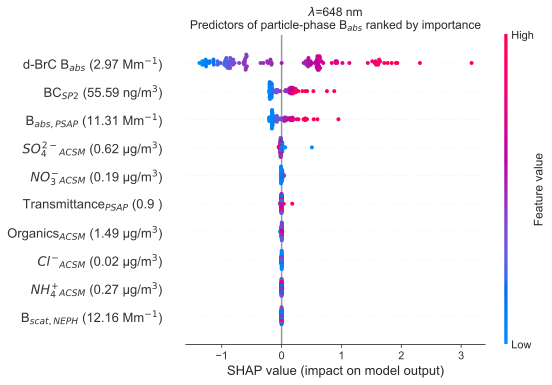

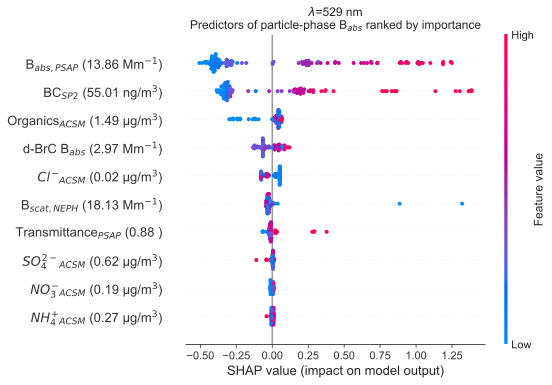

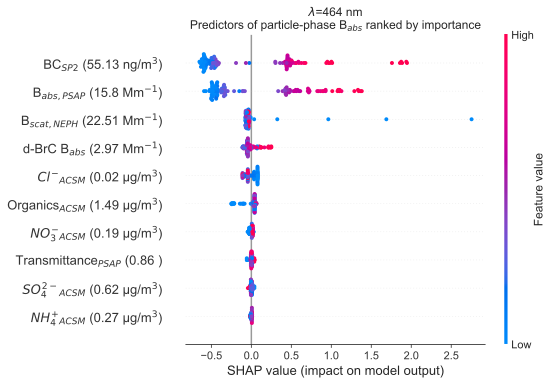

In [58]:
import shap

# set the DPI to a lower value
dpi = 600

# define the regressors
regressors = [
    RandomForestRegressor(n_estimators=1000, max_depth=2),
    RandomForestRegressor(n_estimators=1000, max_depth=2),
    RandomForestRegressor(n_estimators=1000, max_depth=2),
]

# define the plot titles and file names
titles = [
    "$\lambda$=648 nm\nImportant model impactors for predicting particle-phase B$_{abs}$",
    "$\lambda$=529 nm\nImportant model impactors for predicting particle-phase B$_{abs}$",
    "$\lambda$=464 nm\nImportant model impactors for predicting particle-phase B$_{abs}$",
]
filenames = ["ML_Importance@648.png", "ML_Importance@529.png", "ML_Importance@464.png"]

# loop over the regressors and plot the SHAP summary plot for each
for i, (regressor, X_train, y_train, title, filename, mean_x_coord) in enumerate(zip(regressors, [X_train1, X_train2, X_train3], [y_train1, y_train2, y_train3], titles, filenames, [4.25, 2.45, 2.60])):
    # fit the regressor
    regressor.fit(X_train, y_train)
    
    # update column_name_mean_list
    column_name_mean_list = [columns_list[i]+" ("+str(np.round(X_train.mean()[i], 2))+" "+columns_unit_list[i]+")" for i in range(len(columns_list))]

    
    # create the explainer and get the SHAP values
    explainer = shap.TreeExplainer(regressor)
    shap_values = explainer.shap_values(X_train)
    
    # create the summary plot
    fig, ax = plt.subplots()
    shap.summary_plot(shap_values, X_train, feature_names=column_name_mean_list, title=title, show=False)
    plt.xticks(rotation=0, ha='center')

    # save the plot
    plt.title(f"$\lambda$={filename.split('@')[1][0:3]} nm\n" + "Predictors of particle-phase B$_{abs}$ ranked by importance")
    plt.tight_layout()
    plt.savefig(filename, dpi=dpi)
    plt.show()


In [59]:
column_name_mean_list

['B$_{abs, PSAP}$ (15.8 Mm$^{-1}$)',
 'Transmittance$_{PSAP}$ (0.86 )',
 'B$_{scat, NEPH}$ (22.51 Mm$^{-1}$)',
 'Organics$_{ACSM}$ (1.49 μg/m$^3$)',
 '$SO_4^{2-}$$_{ACSM}$ (0.62 μg/m$^3$)',
 '$NH_4^{+}$$_{ACSM}$ (0.27 μg/m$^3$)',
 '$NO_3^{-}$$_{ACSM}$ (0.19 μg/m$^3$)',
 '$Cl^{-}$$_{ACSM}$ (0.02 μg/m$^3$)',
 'BC$_{SP2}$ (55.13 ng/m$^3$)',
 'd-BrC B$_{abs}$ (2.97 Mm$^{-1}$)']